In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
%matplotlib inline
import matplotlib.colors as mcolors

In [2]:
# 데이터 프레임

df = pd.read_csv('vgames4.csv', index_col=[0])

In [3]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [4]:
# 중복값 확인
df.duplicated().sum()  # 1개

# 중복치 제거
df = df.drop_duplicates()
df.shape

(16597, 9)

In [5]:
# 결측치 확인
df.isnull().sum()

Name             0
Platform         0
Year           227
Genre           44
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      2
dtype: int64

In [6]:
# 결측치 제거
df = df.dropna(axis = 0)
df.shape

(16285, 9)

In [7]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [8]:
# NA_Sales


# NA_Sales 에 있는 M 제거

df['NA_Sales'] = df['NA_Sales'].str.replace('M', '')


# K 포함 행 불러오기

test_df = df[df['NA_Sales'].str.contains('K')]


# K 없애고 000붙임

df['NA_Sales'] = df['NA_Sales'].str.replace('K', '000').astype(float)


# 1000000 나눠준 후 원본에 넣어줌

N=df[df['NA_Sales']>=10]
N10 = N['NA_Sales']/1000000
N10.index #이걸 원본에 넣음
df.loc[N10.index,'NA_Sales'] = N10
df['NA_Sales'].head(11)

1     0.04
2     0.17
3     0.00
4     0.04
5     0.12
6     0.00
7     0.02
8     0.07
9     0.00
10    0.04
11    0.48
Name: NA_Sales, dtype: float64

In [9]:
# EU_Sales


# EU_Sales 에 있는 M 제거

df['EU_Sales'] = df['EU_Sales'].str.replace('M', '')


# K 포함 행 불러오기

test_df2 = df[df['EU_Sales'].str.contains('K')]


# K 없애고 000붙임

df['EU_Sales'] = df['EU_Sales'].str.replace('K', '000').astype(float)


# 1000000 나눠준 후 원본에 넣어줌

N2=df[df['EU_Sales']>=10]
N102 = N2['EU_Sales']/1000000
N102.index # 이걸 원본에 넣음
df.loc[N102.index,'EU_Sales'] = N102
df['EU_Sales'].head(11)

1     0.00
2     0.00
3     0.00
4     0.00
5     0.09
6     0.00
7     0.01
8     0.00
9     0.00
10    0.03
11    0.33
Name: EU_Sales, dtype: float64

In [10]:
# JP_Sales


# JP_Sales 에 있는 M 제거

df['JP_Sales'] = df['JP_Sales'].str.replace('M', '')


# K 포함 행 불러오기

test_df3 = df[df['JP_Sales'].str.contains('K')]


# K 없애고 000붙임

df['JP_Sales'] = df['JP_Sales'].str.replace('K', '000').astype(float)


# 1000000 나눠준 후 원본에 넣어줌

N3=df[df['JP_Sales']>=10]
N103 = N3['JP_Sales']/1000000
N103.index # 이걸 원본에 넣음
df.loc[N103.index,'JP_Sales'] = N103
df['JP_Sales'].head(11)

1     0.00
2     0.00
3     0.02
4     0.00
5     0.00
6     0.14
7     0.00
8     0.11
9     0.04
10    0.00
11    0.00
Name: JP_Sales, dtype: float64

In [11]:
# Other_Sales


# Other_Sales 에 있는 M 제거

df['Other_Sales'] = df['Other_Sales'].str.replace('M', '')


# K 포함 행 불러오기

test_df4 = df[df['Other_Sales'].str.contains('K')]


# K 없애고 000붙임

df['Other_Sales'] = df['Other_Sales'].str.replace('K', '000').astype(float)


# 1000000 나눠준 후 원본에 넣어줌

N4=df[df['Other_Sales']>=10]
N104 = N4['Other_Sales']/1000000
N104.index # 이걸 원본에 넣음
df.loc[N104.index,'Other_Sales'] = N104
df['Other_Sales'].head(11)

1     0.00
2     0.01
3     0.00
4     0.00
5     0.04
6     0.00
7     0.00
8     0.01
9     0.00
10    0.01
11    0.06
Name: Other_Sales, dtype: float64

In [12]:
# year int로

df['Year'] = df['Year'].astype('int')

In [13]:
A = df[df['Year'] < 1978].index
df.drop(A,axis='index',inplace=True)
df.reset_index(drop=True, inplace = True)

In [14]:
print(df.dtypes)

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object


In [15]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16252,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16253,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16254,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16255,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [16]:
# df 나라 합 다 더한 값을 global에 넣음

df['Global'] = 0

df['Global'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16252,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16253,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16254,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16255,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [17]:
# 지역에 따라서 선호하는 게임 장르가 다를까?

In [18]:
# df에서 NA 기준 내림차순 (최댓값부터)

df_sort = df.sort_values('NA_Sales', ascending = False)
df_sort.head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global
10469,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.570000,4.13,1.920000,23.430000
6157,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.730000,0.11,1.130000,14.640000
10726,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.310000,0.06,1.380000,16.380000
14562,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.440000,3.84,0.460000,17.280000
14378,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.400000,0.41,0.000011,10.240011
10712,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.590000,2.53,1.790000,22.000000
10945,Nintendogs,DS,2005,Simulation,Nintendo,9.07,0.000011,1.93,2.750000,13.750011
2800,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.280000,0.13,1.320000,14.760000
9264,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.180000,7.20,0.710000,23.090000
3413,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.030000,3.60,2.150000,22.720000


In [19]:
# NA 액션 장르 1

na_a = df.loc[df['Genre'] == 'Action']


# NA 액션 장르 내림차순

na_a_sort = na_a.sort_values('NA_Sales', ascending = False)
na_a_sort

#na_a = na_a['Other_Sales'] = np.arange(0.1, 1+0.1, 0.1)
#na_a

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global
10726,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.380000,16.380000
14378,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,0.000011,10.240011
5268,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.780000,16.150000
3460,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.140000,21.390000
9628,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.300000,13.100000
...,...,...,...,...,...,...,...,...,...,...
6224,Hakuoki: Shinkai - Furi no Shou,PSV,2015,Action,Idea Factory,0.00,0.00,0.02,0.000000,0.020000
6201,Ou to Maou to 7-nin no Himegimitachi: Shin Ous...,PSV,2012,Action,Konami Digital Entertainment,0.00,0.00,0.04,0.000000,0.040000
6165,PriPara & Pretty Rhythm: PriPara de Tsukaeru O...,3DS,2015,Action,Namco Bandai Games,0.00,0.00,0.03,0.000000,0.030000
6138,Abunai: Koi no Sousa Shitsu,PSP,2012,Action,Quinrose,0.00,0.00,0.01,0.000000,0.010000


In [20]:
na_a

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08
15,Mini Ninjas,PS3,2009,Action,Eidos Interactive,0.14,0.16,0.00,0.06,0.36
...,...,...,...,...,...,...,...,...,...,...
16235,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08
16241,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0.00,0.02,0.27
16243,LEGO Indiana Jones 2: The Adventure Continues,Wii,2009,Action,Activision,0.91,0.39,0.00,0.13,1.43
16253,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01


In [21]:
# NA 레이싱 장르 2

na_r = df.loc[df['Genre'] == 'Racing']
na_r

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global
10,Ford Racing,PS,2001,Racing,Empire Interactive,0.48,0.33,0.00,0.06,0.87
26,Starwinder: The Ultimate Space Race,PS,1996,Racing,Mindscape,0.03,0.02,0.00,0.00,0.05
29,McGrath Vs. Pastrana Freestyle Motocross,PS,2000,Racing,Acclaim Entertainment,0.14,0.10,0.00,0.02,0.26
37,Beamrider,2600,1984,Racing,Activision,0.26,0.01,0.00,0.00,0.27
49,Dreamworks Madagascar Kartz,X360,2009,Racing,Activision,0.14,0.09,0.00,0.02,0.25
...,...,...,...,...,...,...,...,...,...,...
16179,R: Racing Evolution,GC,2003,Racing,Namco Bandai Games,0.06,0.02,0.00,0.00,0.08
16194,Mega Man: Battle & Chase,PS,1997,Racing,Capcom,0.00,0.00,0.06,0.00,0.06
16200,Juiced 2: Hot Import Nights,DS,2007,Racing,THQ,0.22,0.00,0.00,0.02,0.24
16203,Richard Burns Rally,PC,2004,Racing,SCi,0.00,0.03,0.00,0.01,0.04


In [22]:
# NA 슈터 장르 3

na_sh = df.loc[df['Genre'] == 'Shooter']
na_sh

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global
27,World of Tanks,PC,2011,Shooter,Wargaming.net,0.00,0.23,0.00,0.06,0.29
32,Project Sylpheed: Arc of Deception,X360,2006,Shooter,Microsoft Game Studios,0.12,0.01,0.02,0.01,0.16
44,Crysis 3,X360,2013,Shooter,Electronic Arts,0.51,0.33,0.01,0.08,0.93
61,Unreal Tournament III,X360,2008,Shooter,Midway Games,0.25,0.17,0.01,0.05,0.48
64,SD Gundam Force,GBA,2004,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...
16211,Syphon Filter 3,PS,2001,Shooter,Sony Computer Entertainment,0.29,0.20,0.00,0.03,0.52
16212,BloodRayne,XB,2002,Shooter,Universal Interactive,0.16,0.05,0.00,0.01,0.22
16213,Left 4 Dead,X360,2008,Shooter,Electronic Arts,2.66,0.50,0.05,0.30,3.51
16244,Bionicle Heroes,DS,2006,Shooter,Eidos Interactive,0.06,0.00,0.00,0.00,0.06


In [23]:
# NA 플랫폼 장르 4

na_p = df.loc[df['Genre'] == 'Platform']
na_p

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.120000,0.09,0.00,0.04,0.250000
20,Ty the Tasmanian Tiger,PS2,2002,Platform,Electronic Arts,0.570000,0.45,0.00,0.15,1.170000
25,Dr. Muto,GC,2002,Platform,Midway Games,0.020000,0.01,0.00,0.00,0.030000
28,Famicom Mini: Makaimura,GBA,2004,Platform,Capcom,0.000000,0.00,0.08,0.00,0.080000
34,Mega Man Anniversary Collection,PS2,2004,Platform,Capcom,0.290000,0.22,0.00,0.08,0.590000
...,...,...,...,...,...,...,...,...,...,...
16192,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,0.000015,7.06,4.70,2.26,14.020015
16223,Wall-E,Wii,2008,Platform,THQ,0.510000,0.40,0.00,0.11,1.020000
16238,Gex: Enter the Gecko,PS,1998,Platform,BMG Interactive Entertainment,0.320000,0.22,0.00,0.04,0.580000
16239,Super Ghouls 'n Ghosts,GBA,2002,Platform,Capcom,0.050000,0.02,0.00,0.00,0.070000


In [24]:
# NA 스포츠 장르 5

na_sp = df.loc[df['Genre'] == 'Sports']
na_sp

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14
17,Hajime no Ippo: The Fighting! (2014),PS3,2014,Sports,Namco Bandai Games,0.00,0.00,0.03,0.00,0.03
22,Cabela's Dangerous Hunts 2,XB,2005,Sports,Activision,0.08,0.02,0.00,0.00,0.10
23,Don Bradman Cricket 14,X360,2014,Sports,Tru Blu Entertainment,0.00,0.01,0.00,0.00,0.01
39,FIFA World Cup Germany 2006,XB,2006,Sports,Electronic Arts,0.18,0.05,0.00,0.01,0.24
...,...,...,...,...,...,...,...,...,...,...
16230,Amped 2,XB,2003,Sports,Microsoft Game Studios,0.20,0.04,0.00,0.01,0.25
16246,Jikkyou Powerful Pro Yakyuu 2000 Ketteiban,PS,2000,Sports,Konami Digital Entertainment,0.00,0.00,0.08,0.01,0.09
16248,Namco Soccer Prime Goal,PS,1995,Sports,Sony Computer Entertainment,0.00,0.00,0.12,0.01,0.13
16250,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,4.18,0.26,0.01,0.08,4.53


In [25]:
# NA 시뮬레이션 장르 6

na_sm = df.loc[df['Genre'] == 'Simulation']
na_sm

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
11,Harvest Moon: More Friends of Mineral Town,GBA,2003,Simulation,Ubisoft,0.14,0.05,0.00,0.00,0.19
21,Ghost in the Shell,PS,1997,Simulation,Sony Computer Entertainment,0.06,0.04,0.00,0.01,0.11
53,IL-2 Sturmovik: Birds of Prey,PS3,2009,Simulation,505 Games,0.34,0.26,0.00,0.10,0.70
121,Armored Core: Master of Arena,PS,1999,Simulation,From Software,0.07,0.05,0.13,0.02,0.27
...,...,...,...,...,...,...,...,...,...,...
16121,Catz,DS,2006,Simulation,Ubisoft,0.49,0.02,0.00,0.04,0.55
16131,Muv-Luv Alternative,PS3,2012,Simulation,5pb,0.00,0.00,0.01,0.00,0.01
16152,1701 A.D.,PC,2006,Simulation,Deep Silver,0.00,0.25,0.00,0.05,0.30
16165,Crafting Mama,DS,2010,Simulation,505 Games,0.40,0.21,0.01,0.05,0.67


In [26]:
# NA 롤플레잉 장르 7

na_rp = df.loc[df['Genre'] == 'Role-Playing']
na_rp

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global
12,Mount & Blade,PC,2008,Role-Playing,Paradox Interactive,0.00,0.02,0.00,0.00,0.02
14,Zoids Dash,DS,2006,Role-Playing,Tomy Corporation,0.00,0.00,0.02,0.00,0.02
18,Grand Kingdom,PS4,2015,Role-Playing,Nippon Ichi Software,0.02,0.00,0.03,0.00,0.05
40,Vagrant Story,PS,2000,Role-Playing,Crave Entertainment,0.30,0.20,0.30,0.06,0.86
62,NieR,X360,2010,Role-Playing,Square Enix,0.13,0.10,0.04,0.02,0.29
...,...,...,...,...,...,...,...,...,...,...
16210,Yu-Gi-Oh! Double Pack,GBA,2006,Role-Playing,Konami Digital Entertainment,0.20,0.08,0.00,0.01,0.29
16215,ASH: Archaic Sealed Heat,DS,2007,Role-Playing,Nintendo,0.00,0.00,0.12,0.00,0.12
16219,Dragon's Crown,PSV,2013,Role-Playing,Nippon Ichi Software,0.16,0.05,0.12,0.05,0.38
16234,Brave Story: New Traveler (US sales),PSP,2006,Role-Playing,Sony Computer Entertainment,0.11,0.00,0.00,0.00,0.11


In [27]:
# NA 퍼즐 장르 8

na_pz = df.loc[df['Genre'] == 'Puzzle']
na_pz

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global
13,The Professor's Brain Trainer: Logic,DS,2005,Puzzle,505 Games,0.02,0.00,0.00,0.00,0.02
59,Bomberman,NES,1985,Puzzle,Hudson Soft,0.18,0.00,0.85,0.00,1.03
78,Sudokuro,DS,2007,Puzzle,Crave Entertainment,0.10,0.00,0.00,0.01,0.11
113,Bubble Bobble Revolution,DS,2005,Puzzle,Atari,0.04,0.00,0.00,0.00,0.04
160,PictoImage,DS,2007,Puzzle,Sega,0.10,0.00,0.00,0.01,0.11
...,...,...,...,...,...,...,...,...,...,...
16110,The New Tetris,N64,1999,Puzzle,Nintendo,0.22,0.05,0.02,0.00,0.29
16143,Brain Boost: Gamma Wave,DS,2005,Puzzle,505 Games,0.14,0.00,0.00,0.01,0.15
16161,The Dark Hills of Cherai,PC,2009,Puzzle,Unknown,0.00,0.01,0.00,0.00,0.01
16206,Boom Blox,Wii,2008,Puzzle,Electronic Arts,0.72,0.38,0.00,0.12,1.22


In [28]:
# NA 파이팅 장르 9

na_f = df.loc[df['Genre'] == 'Fighting']
na_f

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global
24,Injustice: Gods Among Us,PS3,2013,Fighting,Warner Bros. Interactive Entertainment,0.48,0.53,0.01,0.23,1.25
65,Virtua Fighter 3tb,DC,1998,Fighting,Sega,0.00,0.00,0.37,0.00,0.37
84,Tom and Jerry in Fists of Furry,N64,2000,Fighting,Ubisoft,0.13,0.03,0.00,0.00,0.16
126,Mortal Kombat,PS3,2011,Fighting,Warner Bros. Interactive Entertainment,1.98,0.55,0.00,0.32,2.85
128,Rozen Maiden: Gebetgarten,PS2,2007,Fighting,Taito,0.00,0.00,0.01,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...
16153,Mortal Kombat,PSV,2012,Fighting,Warner Bros. Interactive Entertainment,0.47,0.18,0.00,0.12,0.77
16171,Fatal Fury: Battle Archives Volume 1 (JP sales),PS2,2006,Fighting,Ignition Entertainment,0.00,0.00,0.01,0.00,0.01
16209,Dead or Alive 5,PS4,2015,Fighting,Tecmo Koei,0.09,0.13,0.08,0.04,0.34
16231,Koihime Enbu,PS4,2016,Fighting,Yeti,0.00,0.00,0.02,0.00,0.02


In [29]:
# NA 어드벤처 장르 10

na_ad = df.loc[df['Genre'] == 'Adventure']
na_ad

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
8,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00,0.04
42,Phoenix Wright: Ace Attorney - Trials and Trib...,DS,2007,Adventure,Capcom,0.33,0.05,0.25,0.04,0.67
68,Sherlock Holmes: Crimes & Punishments,PS4,2014,Adventure,Focus Home Interactive,0.08,0.14,0.00,0.05,0.27
93,Pac-Man and the Ghostly Adventures 2,PS3,2014,Adventure,Namco Bandai Games,0.05,0.04,0.00,0.02,0.11
...,...,...,...,...,...,...,...,...,...,...
16222,Sherlock Holmes: The Mystery of the Mummy,DS,2009,Adventure,Focus Home Interactive,0.06,0.30,0.00,0.04,0.40
16225,Toshochu: Run for Money,3DS,2012,Adventure,Namco Bandai Games,0.00,0.00,0.62,0.00,0.62
16240,Captain Morgane and the Golden Turtle,DS,2012,Adventure,Reef Entertainment,0.00,0.03,0.00,0.00,0.03
16245,Pokemon Channel,GC,2003,Adventure,Nintendo,0.24,0.06,0.07,0.01,0.38


In [30]:
# NA misc 장르 11

na_mi = df.loc[df['Genre'] == 'Misc']
na_mi

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
30,Kids Learn Music A+ Edition,DS,2011,Misc,Unknown,0.05,0.00,0.00,0.00,0.05
31,Rock Band,X360,2007,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
33,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
54,Rockin' Pretty,DS,2009,Misc,Arc System Works,0.05,0.00,0.00,0.00,0.05
...,...,...,...,...,...,...,...,...,...,...
16184,Gotouchi Tetsudou: Gotouchi Chara to Nihon Zen...,3DS,2014,Misc,Namco Bandai Games,0.00,0.00,0.12,0.00,0.12
16193,Karaoke Revolution Glee: Volume 3,X360,2011,Misc,Konami Digital Entertainment,0.13,0.00,0.00,0.01,0.14
16226,Um Jammer Lammy,PS,1998,Misc,Sony Computer Entertainment,0.12,0.08,0.41,0.04,0.65
16237,Pinball Hall of Fame: The Gottlieb Collection,PSP,2005,Misc,Play It,0.20,0.01,0.00,0.02,0.23


In [31]:
#df

In [32]:
# NA 장르 별 평균값 구하기


# NA action 장르만 추출

frame = df_sort.loc[ df_sort["Genre"]=="Action", ["NA_Sales"] ]
print(round(frame.sum() / 3250, 2))
# 3250 rows
# 0.26


# NA Racing 장르만 추출

frame2 = df_sort.loc[ df_sort["Genre"]=="Racing", ["NA_Sales"] ]
print(round(frame2.sum() / 1220, 2))
# 1220 rows
# 0.28


# NA Shooter 장르만 추출

frame3 = df_sort.loc[ df_sort["Genre"]=="Shooter", ["NA_Sales"] ]
print(round(frame3.sum() / 1283, 2))
# 1220 rows
# 0.43


# NA Platform 장르만 추출

frame4 = df_sort.loc[ df_sort["Genre"]=="Platform", ["NA_Sales"] ]
print(round(frame4.sum() / 879, 2))
# 879 rows
# 0.42


# NA Sports 장르만 추출

frame5 = df_sort.loc[ df_sort["Genre"]=="Sports", ["NA_Sales"] ]
print(round(frame5.sum() / 2309, 2))
# 2309 rows
# 0.27


# NA Simulation 장르만 추출

frame6 = df_sort.loc[ df_sort["Genre"]=="Simulation", ["NA_Sales"] ]
print(round(frame6.sum() / 850, 2))
# 850 rows
# 0.21


# NA Role-Playing 장르만 추출

frame7 = df_sort.loc[ df_sort["Genre"]=="Role-Playing", ["NA_Sales"] ]
print(round(frame7.sum() / 1470, 2))
# 1470 rows
# 0.21


# NA Puzzle 장르만 추출

frame8 = df_sort.loc[ df_sort["Genre"]=="Puzzle", ["NA_Sales"] ]
print(round(frame8.sum() / 568, 2))
# 568 rows
# 0.17


# NA Fighting 장르만 추출

frame9 = df_sort.loc[ df_sort["Genre"]=="Fighting", ["NA_Sales"] ]
print(round(frame9.sum() / 836, 2))
# 836 rows
# 0.26


# NA Adventure 장르만 추출

frame10 = df_sort.loc[ df_sort["Genre"]=="Adventure", ["NA_Sales"] ]
print(round(frame10.sum() / 1267, 2))
# 1267 rows
# 0.08


# NA Misc 장르만 추출

frame11 = df_sort.loc[ df_sort["Genre"]=="Misc", ["NA_Sales"] ]
print(round(frame11.sum() / 1684, 2))
# 1684 rows
# 0.22

NA_Sales    0.26
dtype: float64
NA_Sales    0.28
dtype: float64
NA_Sales    0.43
dtype: float64
NA_Sales    0.42
dtype: float64
NA_Sales    0.27
dtype: float64
NA_Sales    0.21
dtype: float64
NA_Sales    0.21
dtype: float64
NA_Sales    0.17
dtype: float64
NA_Sales    0.26
dtype: float64
NA_Sales    0.08
dtype: float64
NA_Sales    0.22
dtype: float64


0           Action
1           Action
2        Adventure
3             Misc
4         Platform
           ...    
16252     Platform
16253       Action
16254       Sports
16255       Action
16256     Fighting
Name: Genre, Length: 16257, dtype: object
{'Misc', 'Fighting', 'Simulation', 'Adventure', 'Strategy', 'Puzzle', 'Shooter', 'Sports', 'Role-Playing', 'Platform', 'Racing', 'Action'}
[0.22, 0.26, 0.21, 0.08, 0.1, 0.17, 0.43, 0.27, 0.21, 0.42, 0.28, 0.26]


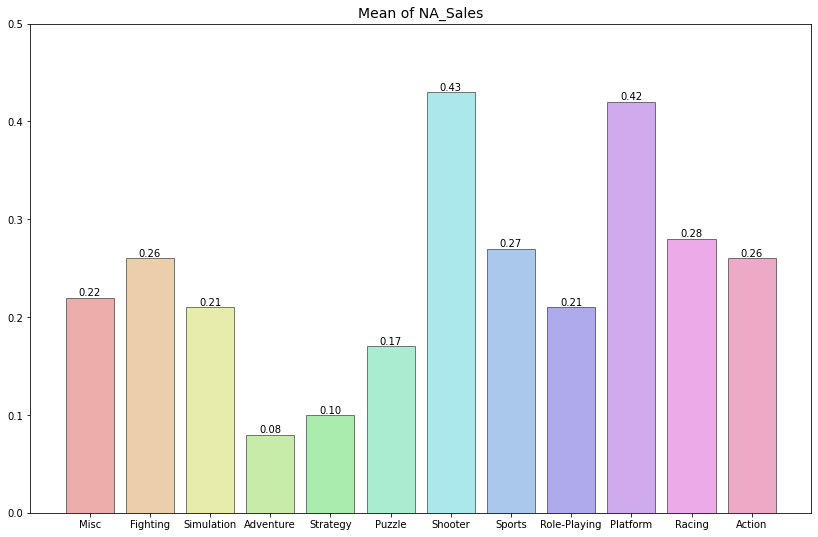

In [33]:
## 지역 이름,  중복되는 내용
name_sales = "NA_Sales"

## 데이터 내림차순
df_sort3 = df.sort_values(name_sales, ascending = False)

# set: 집합 // 중복이 없는 리스트 비슷한 녀석 ->> 똑같은 거 잇으면 무시함
Genres = set(df["Genre"])
print(df["Genre"])
print(Genres)

## 데이터 저장할 빈 리스트 선언
tmp_list =[]

# for문으로 반복하기, Genres에 있는 거를 gen에 넣어서 매번 반복
# 앞에 칸 비워서 괄호 대신 잊지말것 
for gen in Genres:
  # 장르에 맞는 데이터 불러오기
  tmp_frame = df_sort3.loc[ df_sort3["Genre"]==gen, [name_sales] ]

  # len 명령, length :: 데이터 길이, 데이터가 몇개나 있는지 혹은 row가 몇개인지 즉 데이터 갯수
  length = len(tmp_frame)

  #print(tmp_frame)
  #print(round(tmp_frame.sum() / length, 2))

  # 평균 계산할때 직접 갯수 넣지말고, 갯수를 len 함수로 불러와서 평균 계산
  tmp_value=round(tmp_frame.sum() / length, 2)
  #print(tmp_value[0])

  # 계산한 평균을 만들어둔 리스트에 저장, 이때 tmp_value 데이터 프레임 형태여서, [0]을 써서 0번째 인덱스인 실제 값만 저장
  tmp_list.append(tmp_value[0])

print(tmp_list)

# 데이터 만들때, 평균값을 모아둔 리스트 tmp_list와 장르 이름을 모아둔 집합 Genres를 columns으로 하여서 생성
tmp_bar = pd.DataFrame([tmp_list],
                      columns = Genres,
                      index = [1])
tmp_bar



# 데이터 시각화

import matplotlib.pyplot as plt


plt.figure(figsize=(14,9)) ## Figure 생성 사이즈
xtick_label_position = list(range(len(tmp_bar.columns))) ## x축 눈금 라벨이 표시될 x좌표
colors = sns.color_palette('hls',len(tmp_bar.iloc[0])) ## 색상 지정

tmp_plt = plt.bar(tmp_bar.columns, tmp_bar.iloc[0],
              alpha=0.5, edgecolor='black', color = colors)

for rect in tmp_plt:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()*(1/2), height, '%.2f' % height, ha='center', va='bottom', size = 10)

plt.ylim(0, 0.5)

# 타이틀 이름을 앞서 정해둔 지역 이름에 맞춰서 자동으로 변경
plt.title('Mean of '+name_sales, fontsize=14)

plt.show()

0           Action
1           Action
2        Adventure
3             Misc
4         Platform
           ...    
16252     Platform
16253       Action
16254       Sports
16255       Action
16256     Fighting
Name: Genre, Length: 16257, dtype: object
{'Misc', 'Fighting', 'Simulation', 'Adventure', 'Strategy', 'Puzzle', 'Shooter', 'Sports', 'Role-Playing', 'Platform', 'Racing', 'Action'}
[0.12, 0.12, 0.12, 0.05, 0.07, 0.09, 0.24, 0.14, 0.13, 0.23, 0.18, 0.16]


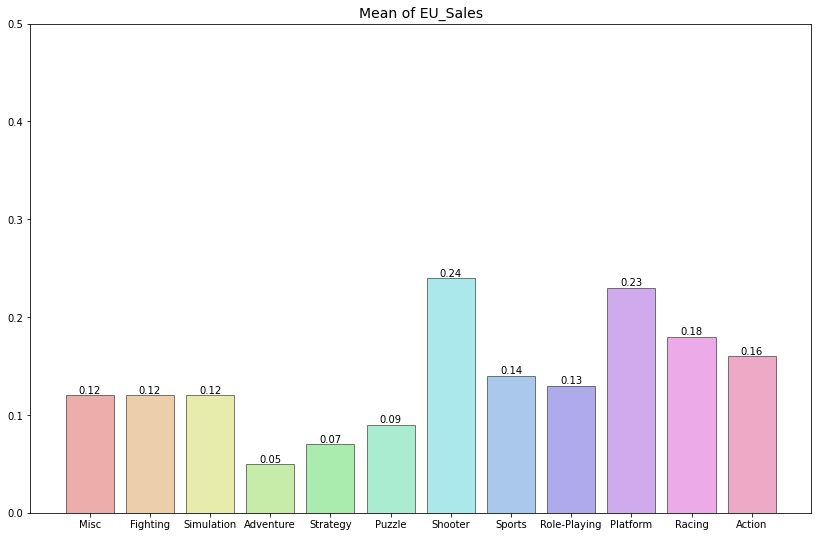

In [34]:
## 지역 이름,  중복되는 내용
name_sales = "EU_Sales"

## 데이터 내림차순
df_sort3 = df.sort_values(name_sales, ascending = False)

# set: 집합 // 중복이 없는 리스트 비슷한 녀석 ->> 똑같은 거 잇으면 무시함
Genres = set(df["Genre"])
print(df["Genre"])
print(Genres)

## 데이터 저장할 빈 리스트 선언
tmp_list =[]

# for문으로 반복하기, Genres에 있는 거를 gen에 넣어서 매번 반복
# 앞에 칸 비워서 괄호 대신 잊지말것 
for gen in Genres:
  # 장르에 맞는 데이터 불러오기
  tmp_frame = df_sort3.loc[ df_sort3["Genre"]==gen, [name_sales] ]

  # len 명령, length :: 데이터 길이, 데이터가 몇개나 있는지 혹은 row가 몇개인지 즉 데이터 갯수
  length = len(tmp_frame)

  #print(tmp_frame)
  #print(round(tmp_frame.sum() / length, 2))

  # 평균 계산할때 직접 갯수 넣지말고, 갯수를 len 함수로 불러와서 평균 계산
  tmp_value=round(tmp_frame.sum() / length, 2)
  #print(tmp_value[0])

  # 계산한 평균을 만들어둔 리스트에 저장, 이때 tmp_value 데이터 프레임 형태여서, [0]을 써서 0번째 인덱스인 실제 값만 저장
  tmp_list.append(tmp_value[0])

print(tmp_list)

# 데이터 만들때, 평균값을 모아둔 리스트 tmp_list와 장르 이름을 모아둔 집합 Genres를 columns으로 하여서 생성
tmp_bar = pd.DataFrame([tmp_list],
                      columns = Genres,
                      index = [1])
tmp_bar



# 데이터 시각화

import matplotlib.pyplot as plt


plt.figure(figsize=(14,9)) ## Figure 생성 사이즈
xtick_label_position = list(range(len(tmp_bar.columns))) ## x축 눈금 라벨이 표시될 x좌표
colors = sns.color_palette('hls',len(tmp_bar.iloc[0])) ## 색상 지정

tmp_plt = plt.bar(tmp_bar.columns, tmp_bar.iloc[0],
              alpha=0.5, edgecolor='black', color = colors)

for rect in tmp_plt:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()*(1/2), height, '%.2f' % height, ha='center', va='bottom', size = 10)

plt.ylim(0, 0.5)

# 타이틀 이름을 앞서 정해둔 지역 이름에 맞춰서 자동으로 변경
plt.title('Mean of '+name_sales, fontsize=14)

plt.show()

0           Action
1           Action
2        Adventure
3             Misc
4         Platform
           ...    
16252     Platform
16253       Action
16254       Sports
16255       Action
16256     Fighting
Name: Genre, Length: 16257, dtype: object
{'Misc', 'Fighting', 'Simulation', 'Adventure', 'Strategy', 'Puzzle', 'Shooter', 'Sports', 'Role-Playing', 'Platform', 'Racing', 'Action'}
[0.06, 0.1, 0.07, 0.04, 0.07, 0.1, 0.03, 0.06, 0.23, 0.15, 0.05, 0.05]


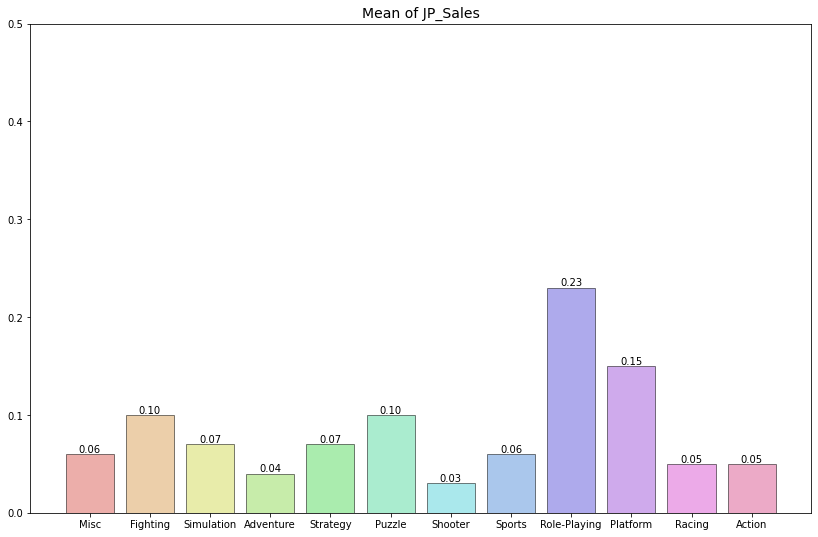

In [35]:
## 지역 이름,  중복되는 내용
name_sales = "JP_Sales"

## 데이터 내림차순
df_sort3 = df.sort_values(name_sales, ascending = False)

# set: 집합 // 중복이 없는 리스트 비슷한 녀석 ->> 똑같은 거 잇으면 무시함
Genres = set(df["Genre"])
print(df["Genre"])
print(Genres)

## 데이터 저장할 빈 리스트 선언
tmp_list =[]

# for문으로 반복하기, Genres에 있는 거를 gen에 넣어서 매번 반복
# 앞에 칸 비워서 괄호 대신 잊지말것 
for gen in Genres:
  # 장르에 맞는 데이터 불러오기
  tmp_frame = df_sort3.loc[ df_sort3["Genre"]==gen, [name_sales] ]

  # len 명령, length :: 데이터 길이, 데이터가 몇개나 있는지 혹은 row가 몇개인지 즉 데이터 갯수
  length = len(tmp_frame)

  #print(tmp_frame)
  #print(round(tmp_frame.sum() / length, 2))

  # 평균 계산할때 직접 갯수 넣지말고, 갯수를 len 함수로 불러와서 평균 계산
  tmp_value=round(tmp_frame.sum() / length, 2)
  #print(tmp_value[0])

  # 계산한 평균을 만들어둔 리스트에 저장, 이때 tmp_value 데이터 프레임 형태여서, [0]을 써서 0번째 인덱스인 실제 값만 저장
  tmp_list.append(tmp_value[0])

print(tmp_list)

# 데이터 만들때, 평균값을 모아둔 리스트 tmp_list와 장르 이름을 모아둔 집합 Genres를 columns으로 하여서 생성
tmp_bar = pd.DataFrame([tmp_list],
                      columns = Genres,
                      index = [1])
tmp_bar



# 데이터 시각화

import matplotlib.pyplot as plt


plt.figure(figsize=(14,9)) ## Figure 생성 사이즈
xtick_label_position = list(range(len(tmp_bar.columns))) ## x축 눈금 라벨이 표시될 x좌표
colors = sns.color_palette('hls',len(tmp_bar.iloc[0])) ## 색상 지정

tmp_plt = plt.bar(tmp_bar.columns, tmp_bar.iloc[0],
              alpha=0.5, edgecolor='black', color = colors)

for rect in tmp_plt:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()*(1/2), height, '%.2f' % height, ha='center', va='bottom', size = 10)

plt.ylim(0, 0.5)

# 타이틀 이름을 앞서 정해둔 지역 이름에 맞춰서 자동으로 변경
plt.title('Mean of '+name_sales, fontsize=14)

plt.show()

0           Action
1           Action
2        Adventure
3             Misc
4         Platform
           ...    
16252     Platform
16253       Action
16254       Sports
16255       Action
16256     Fighting
Name: Genre, Length: 16257, dtype: object
{'Misc', 'Fighting', 'Simulation', 'Adventure', 'Strategy', 'Puzzle', 'Shooter', 'Sports', 'Role-Playing', 'Platform', 'Racing', 'Action'}
[0.04, 0.04, 0.04, 0.01, 0.02, 0.02, 0.08, 0.06, 0.04, 0.06, 0.06, 0.05]


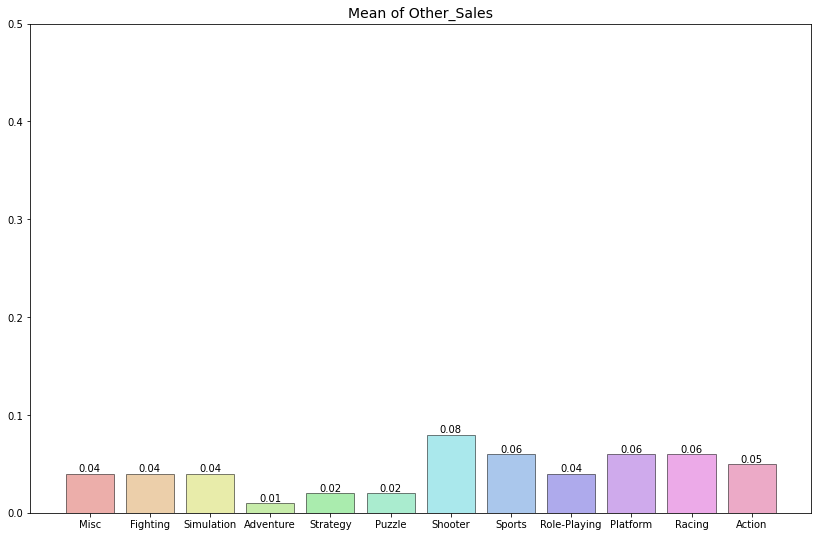

In [36]:
## 지역 이름,  중복되는 내용
name_sales = "Other_Sales"

## 데이터 내림차순
df_sort3 = df.sort_values(name_sales, ascending = False)

# set: 집합 // 중복이 없는 리스트 비슷한 녀석 ->> 똑같은 거 잇으면 무시함
Genres = set(df["Genre"])
print(df["Genre"])
print(Genres)

## 데이터 저장할 빈 리스트 선언
tmp_list =[]

# for문으로 반복하기, Genres에 있는 거를 gen에 넣어서 매번 반복
# 앞에 칸 비워서 괄호 대신 잊지말것 
for gen in Genres:
  # 장르에 맞는 데이터 불러오기
  tmp_frame = df_sort3.loc[ df_sort3["Genre"]==gen, [name_sales] ]

  # len 명령, length :: 데이터 길이, 데이터가 몇개나 있는지 혹은 row가 몇개인지 즉 데이터 갯수
  length = len(tmp_frame)

  #print(tmp_frame)
  #print(round(tmp_frame.sum() / length, 2))

  # 평균 계산할때 직접 갯수 넣지말고, 갯수를 len 함수로 불러와서 평균 계산
  tmp_value=round(tmp_frame.sum() / length, 2)
  #print(tmp_value[0])

  # 계산한 평균을 만들어둔 리스트에 저장, 이때 tmp_value 데이터 프레임 형태여서, [0]을 써서 0번째 인덱스인 실제 값만 저장
  tmp_list.append(tmp_value[0])

print(tmp_list)

# 데이터 만들때, 평균값을 모아둔 리스트 tmp_list와 장르 이름을 모아둔 집합 Genres를 columns으로 하여서 생성
tmp_bar = pd.DataFrame([tmp_list],
                      columns = Genres,
                      index = [1])
tmp_bar



# 데이터 시각화

import matplotlib.pyplot as plt


plt.figure(figsize=(14,9)) ## Figure 생성 사이즈
xtick_label_position = list(range(len(tmp_bar.columns))) ## x축 눈금 라벨이 표시될 x좌표
colors = sns.color_palette('hls',len(tmp_bar.iloc[0])) ## 색상 지정

tmp_plt = plt.bar(tmp_bar.columns, tmp_bar.iloc[0],
              alpha=0.5, edgecolor='black', color = colors)

for rect in tmp_plt:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()*(1/2), height, '%.2f' % height, ha='center', va='bottom', size = 10)

plt.ylim(0, 0.5)

# 타이틀 이름을 앞서 정해둔 지역 이름에 맞춰서 자동으로 변경
plt.title('Mean of '+name_sales, fontsize=14)

plt.show()

0           Action
1           Action
2        Adventure
3             Misc
4         Platform
           ...    
16252     Platform
16253       Action
16254       Sports
16255       Action
16256     Fighting
Name: Genre, Length: 16257, dtype: object
{'Misc', 'Fighting', 'Simulation', 'Adventure', 'Strategy', 'Puzzle', 'Shooter', 'Sports', 'Role-Playing', 'Platform', 'Racing', 'Action'}
[0.45, 0.53, 0.45, 0.18, 0.26, 0.38, 0.78, 0.52, 0.6, 0.86, 0.57, 0.52]


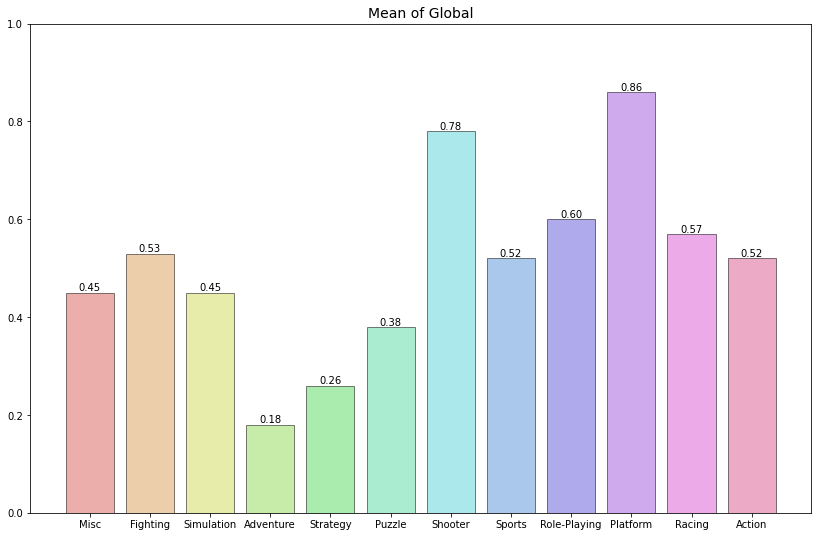

In [37]:
## 지역 이름,  중복되는 내용
name_sales = "Global"

## 데이터 내림차순
df_sort3 = df.sort_values(name_sales, ascending = False)

# set: 집합 // 중복이 없는 리스트 비슷한 녀석 ->> 똑같은 거 잇으면 무시함
Genres = set(df["Genre"])
print(df["Genre"])
print(Genres)

## 데이터 저장할 빈 리스트 선언
tmp_list =[]

# for문으로 반복하기, Genres에 있는 거를 gen에 넣어서 매번 반복
# 앞에 칸 비워서 괄호 대신 잊지말것 
for gen in Genres:
  # 장르에 맞는 데이터 불러오기
  tmp_frame = df_sort3.loc[ df_sort3["Genre"]==gen, [name_sales] ]

  # len 명령, length :: 데이터 길이, 데이터가 몇개나 있는지 혹은 row가 몇개인지 즉 데이터 갯수
  length = len(tmp_frame)

  #print(tmp_frame)
  #print(round(tmp_frame.sum() / length, 2))

  # 평균 계산할때 직접 갯수 넣지말고, 갯수를 len 함수로 불러와서 평균 계산
  tmp_value=round(tmp_frame.sum() / length, 2)
  #print(tmp_value[0])

  # 계산한 평균을 만들어둔 리스트에 저장, 이때 tmp_value 데이터 프레임 형태여서, [0]을 써서 0번째 인덱스인 실제 값만 저장
  tmp_list.append(tmp_value[0])

print(tmp_list)

# 데이터 만들때, 평균값을 모아둔 리스트 tmp_list와 장르 이름을 모아둔 집합 Genres를 columns으로 하여서 생성
tmp_bar = pd.DataFrame([tmp_list],
                      columns = Genres,
                      index = [1])
tmp_bar



# 데이터 시각화

import matplotlib.pyplot as plt


plt.figure(figsize=(14,9)) ## Figure 생성 사이즈
xtick_label_position = list(range(len(tmp_bar.columns))) ## x축 눈금 라벨이 표시될 x좌표
colors = sns.color_palette('hls',len(tmp_bar.iloc[0])) ## 색상 지정

tmp_plt = plt.bar(tmp_bar.columns, tmp_bar.iloc[0],
              alpha=0.5, edgecolor='black', color = colors)

for rect in tmp_plt:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()*(1/2), height, '%.2f' % height, ha='center', va='bottom', size = 10)

plt.ylim(0, 1.0)

# 타이틀 이름을 앞서 정해둔 지역 이름에 맞춰서 자동으로 변경
plt.title('Mean of '+name_sales, fontsize=14)

plt.show()

In [38]:
na_m = [0.21, 0.21, 0.43, 0.42, 0.1, 0.26, 0.17, 0.26, 0.08, 0.22, 0.27, 0.28]

eu_m = [0.12, 0.13, 0.24, 0.23, 0.07, 0.12, 0.09, 0.16, 0.05, 0.12, 0.14, 0.18]

jp_m = [0.07, 0.23, 0.03, 0.15, 0.07, 0.1, 0.1, 0.05, 0.04, 0.06, 0.06, 0.05]

other_m = [0.04, 0.04, 0.08, 0.06, 0.02, 0.04, 0.02, 0.05, 0.01, 0.04, 0.06, 0.06]

global_m = [0.45, 0.6, 0.78, 0.86, 0.26, 0.53, 0.38, 0.52, 0.18, 0.45, 0.52, 0.57]

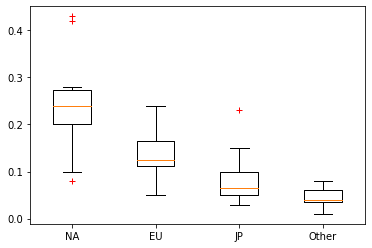

In [39]:
# box plot
mean_data = [na_m, eu_m, jp_m, other_m]
plt.boxplot(mean_data, sym="r+")
plt.xticks([1, 2, 3, 4],['NA', 'EU', 'JP', 'Other'])
plt.show()
# 그림 보면 차이 있어보임
# 평균값의 차이가 실제로 의미있는 차이인지 분산이 커서 그런건지 애매함 -> 이원분산분석 투 웨이 아노바 실행

In [40]:
# F분포를 활용하는 분산분석(Anova) 실시 
import scipy.stats as stats

F_val, p_val = stats.f_oneway(na_m, eu_m, jp_m, other_m)
print("F-value:", round(F_val, 2), "p-value:", round(p_val, 15))

# p-value 0.05 보다 작으므로 귀무가설 기각 가능
# --> 모든 그룹 평균값의 유의미한 차이가 있다.
# --> 지역에 따라 선호하는 게임 장르가 있다.

F-value: 19.59 p-value: 3.2452155e-08


In [41]:
# 분석 결과, 나라에 따른 게임 장르의 평균 차이는 F value 19.59, p value 0.05 이하로 유의미한 차이가 있었습니다.

In [42]:
# JP 년도 별
na_year = "Year"

year_sort = df.sort_values(na_year, ascending = False)
year_sort

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global
6802,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
14925,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
5238,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
9942,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
10196,TrackMania Turbo,XOne,2016,Action,Ubisoft,0.02,0.03,0.00,0.00,0.05
...,...,...,...,...,...,...,...,...,...,...
12884,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34
5646,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
13982,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
7207,Checkers,2600,1980,Misc,Atari,0.22,0.01,0.00,0.00,0.23


In [43]:
sum_columns = df[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']].sum()
print(sum_columns)
all_sales = 4071.62 + 2333.13 + 1262.57 + 773.91
all_sales

NA_Sales       4071.620242
EU_Sales       2333.130064
JP_Sales       1262.570010
Other_Sales     773.910011
dtype: float64


8441.23

In [44]:
# year for문

years = set(df["Year"])
#print(df["Year"])
#print(years)


year_list =[]
# year_in = df['Year']
# JP action 장르만 추출


#tmp_year = 2000

#df_action = df.loc[df['Genre'] == 'Action']

# for문으로 반복하기, Genres에 있는 거를 gen에 넣어서 매번 반복
# 앞에 칸 비워서 괄호 대신 잊지말것 
for yea in years:
  # 장르에 맞는 데이터 불러오기
  tmp_df = df.loc[df["Year"]==yea]
  tmp_df_sum = tmp_df.sum()
  print(tmp_df_sum['NA_Sales'])

  #tmp_list.append(tmp_na_sum[0])

print(year_list)

0.42
10.129999999999999
33.4
26.92
7.76
6.350026929999999
4.6500290799999995
12.5
8.46
23.869999999999997
11.12003403
12.68001278
12.76
33.87
15.120000000000001
28.15
24.82
75.32001127
95.43
127.80999999999999
125.38
94.42
174.0
216.13
193.43
216.19
241.95
196.28006689999998
312.55
334.79001585000003
308.22003034
286.54001497
234.15
154.5
154.83
131.97
101.82000000000001
22.66
0.0
0.27
[]


In [45]:
# 장르 for문


tmp_list =[]
# JP action 장르만 추출

# 참고
tmp_frame = df.loc[ df["Genre"]=="Action", [name_sales] ]
print(tmp_frame)
print(round(tmp_frame.sum(), 2))


## 지역 이름,  중복되는 내용
name_sales = "Other_Sales"

## 데이터 내림차순
#df_sort3 = df.sort_values(name_sales, ascending = False)

# set: 집합 // 중복이 없는 리스트 비슷한 녀석 ->> 똑같은 거 잇으면 무시함
Genres = set(df["Genre"])
print(df["Genre"])
print(Genres)

## 데이터 저장할 빈 리스트 선언
tmp_list =[]

# for문으로 반복하기, Genres에 있는 거를 gen에 넣어서 매번 반복
# 앞에 칸 비워서 괄호 대신 잊지말것 
for gen in Genres:
  # 장르에 맞는 데이터 불러오기
  tmp_frame = df.loc[ df["Genre"]==gen, [name_sales] ]

  # len 명령, length :: 데이터 길이, 데이터가 몇개나 있는지 혹은 row가 몇개인지 즉 데이터 갯수
  #length = len(tmp_frame)

  #print(tmp_frame)
  #print(round(tmp_frame.sum() / length, 2))

  # 평균 계산할때 직접 갯수 넣지말고, 갯수를 len 함수로 불러와서 평균 계산
  tmp_value=round(tmp_frame.sum(), 2)
  print(tmp_value[0])

  # 계산한 평균을 만들어둔 리스트에 저장, 이때 tmp_value 데이터 프레임 형태여서, [0]을 써서 0번째 인덱스인 실제 값만 저장
  tmp_list.append(tmp_value[0])

print(tmp_list)

       Global
0        0.04
1        0.18
7        0.19
9        0.08
15       0.36
...       ...
16235    1.08
16241    0.27
16243    1.43
16253    0.01
16255    0.38

[3248 rows x 1 columns]
Global    1704.95
dtype: float64
0           Action
1           Action
2        Adventure
3             Misc
4         Platform
           ...    
16252     Platform
16253       Action
16254       Sports
16255       Action
16256     Fighting
Name: Genre, Length: 16257, dtype: object
{'Misc', 'Fighting', 'Simulation', 'Adventure', 'Strategy', 'Puzzle', 'Shooter', 'Sports', 'Role-Playing', 'Platform', 'Racing', 'Action'}
72.85
36.12
31.4
16.7
11.23
12.42
102.0
132.58
56.37
51.53
76.5
174.21
[72.85, 36.12, 31.4, 16.7, 11.23, 12.42, 102.0, 132.58, 56.37, 51.53, 76.5, 174.21]


In [46]:
temp_g = df.loc[ df["Genre"]=="Action"]
temp_g

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08
15,Mini Ninjas,PS3,2009,Action,Eidos Interactive,0.14,0.16,0.00,0.06,0.36
...,...,...,...,...,...,...,...,...,...,...
16235,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08
16241,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0.00,0.02,0.27
16243,LEGO Indiana Jones 2: The Adventure Continues,Wii,2009,Action,Activision,0.91,0.39,0.00,0.13,1.43
16253,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01


In [47]:
temp_g_y = temp_g.loc[ temp_g["Year"]==2011]
temp_g_y

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08
63,Rango: The Video Game,Wii,2011,Action,Electronic Arts,0.08,0.04,0.00,0.01,0.13
92,Disney Universe,Wii,2011,Action,Disney Interactive Studios,0.67,0.30,0.00,0.10,1.07
164,El Shaddai: Ascension of the Metatron,X360,2011,Action,Ignition Entertainment,0.07,0.05,0.03,0.01,0.16
261,Frogger 3D,3DS,2011,Action,Konami Digital Entertainment,0.16,0.03,0.00,0.01,0.20
...,...,...,...,...,...,...,...,...,...,...
15445,Sengoku Musou 3: Moushouden,Wii,2011,Action,Ackkstudios,0.00,0.00,0.08,0.00,0.08
15667,Assassin's Creed: Revelations,PS3,2011,Action,Ubisoft,1.41,2.02,0.10,0.72,4.25
15688,Dynasty Warriors 7,X360,2011,Action,Tecmo Koei,0.16,0.07,0.00,0.02,0.25
15887,LEGO Pirates of the Caribbean: The Video Game,Wii,2011,Action,Disney Interactive Studios,0.76,0.72,0.00,0.16,1.64


In [48]:
temp_g_y.sum()["NA_Sales"]

53.78

In [49]:
# 2번 질문 (년도 별 게임의 트렌드)

# 장르에 대한 트렌드

# 장르 하나 뽑고 -> 거기서 년도 하나 뽑아서 -> 그 중에서 NA의 값의 총합으로 묶은 리스트 -> 인데 그것이 년도 하나하나 있는 걸 묶은 리스트 
genre2 = set(df['Genre'])
years = set(df["Year"])  #<- 아까 만듦

genre_list = []

for genr_l in genre2:
  temp_g = df.loc[ df["Genre"]==genr_l]
  y_l = []
  for ye in years:
    temp_y = temp_g.loc[temp_g["Year"]==ye]
    y_l.append(temp_y.sum()["NA_Sales"]) 
  genre_list.append(y_l)

# 전세계
# y_l.append(temp_y.sum()["NA_Sales"] + temp_y.sum()["EU_Sales"] + temp_y.sum()["JP_Sales"] + temp_y.sum()["Others_Sales"])




#for i in range(len(genre_list)):
 # print(genre_list[i])


NA_Sales_tmp = pd.DataFrame(genre_list,columns=years,index=genre2).transpose()
NA_Sales_tmp
#print(len(NA_Sales_tmp))

,Misc,Fighting,Simulation,Adventure,Strategy,Puzzle,Shooter,Sports,Role-Playing,Platform,Racing,Action
1978,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.42
1980,2.530000,0.72,0.00,0.00,0.00,0.000000,6.560000,0.000000,0.000000,0.000000,0.000000,0.32
1981,0.000000,0.00,0.42,0.00,0.00,2.090000,9.370000,0.740000,0.000000,6.470000,0.450000,13.86
1982,0.810000,0.00,0.00,0.00,0.00,9.350000,3.550000,0.980000,0.000000,4.690000,1.470000,6.07
1983,0.010000,0.00,0.00,0.38,0.00,0.720000,0.450000,0.730000,0.000000,2.800000,0.000000,2.67
1984,0.000000,0.00,0.00,0.00,0.00,0.690000,0.860027,1.700000,0.000000,0.000000,2.300000,0.80
1985,0.000000,0.00,0.00,0.00,0.00,1.330000,0.650000,0.180000,0.000000,0.850029,0.000000,1.64
1986,0.000000,0.00,0.00,0.00,0.00,0.000000,0.940000,2.350000,0.490000,1.070000,1.130000,6.52
1987,0.000000,2.80,0.00,2.19,0.00,0.000000,0.660000,0.400000,0.470000,0.900000,0.000000,1.04
1988,0.000000,0.00,0.00,0.00,0.00,2.970000,0.470000,1.370000,0.100000,16.340000,1.470000,1.15


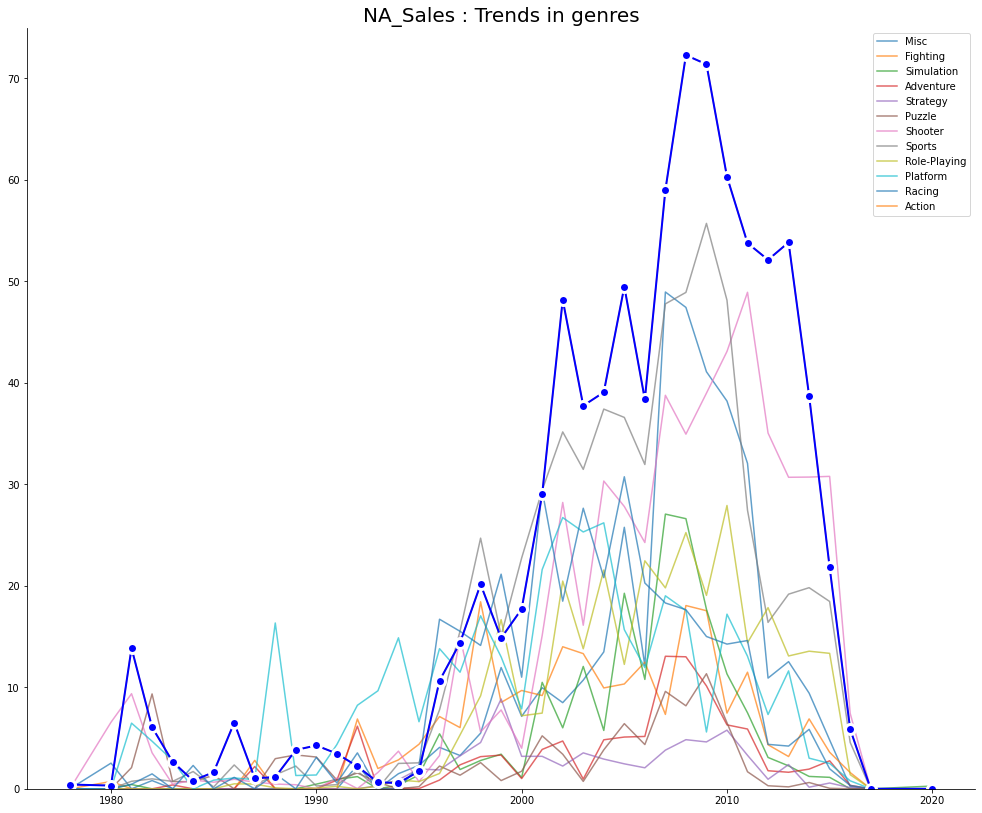

In [50]:
fig= plt.figure(figsize=(17,14))
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
for col in NA_Sales_tmp.columns:
  plt.plot(NA_Sales_tmp[col], alpha=0.7)
plt.legend(NA_Sales_tmp.columns)
plt.ylim(0, 75)

args_plot = [NA_Sales_tmp["Action"]] ## 데이터 인자
config_plot = dict( ## 키워드 인자
    color='blue', # 선 색깔
    linestyle='solid', # 선 스타일
    linewidth=2, # 선 두께 
)
 
ax.plot(marker='o',markersize=10,\
        markeredgecolor='white', markeredgewidth=3,\
        *args_plot,**config_plot) ## 선그래프 생성

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
 
#plt.xticks(np.arange(labels=['', '1980', '', '1990', '', '2000', '', '2010', '', '2020']) 
plt.title('NA_Sales : Trends in genres',fontsize=20) ## 타이틀 설정  # Action 2008년 72.3으로 가장 높음
plt.show()

plt.show()

In [51]:
# 2번 질문 (년도 별 게임의 트렌드)

# 장르에 대한 트렌드

# 장르 하나 뽑고 -> 거기서 년도 하나 뽑아서 -> 그 중에서 NA의 값의 총합으로 묶은 리스트 -> 인데 그것이 년도 하나하나 있는 걸 묶은 리스트 
genre2 = set(df['Genre'])
years = set(df["Year"])  #<- 아까 만듦

genre_list = []

for genr_l in genre2:
  temp_g = df.loc[ df["Genre"]==genr_l]
  y_l = []
  for ye in years:
    temp_y = temp_g.loc[temp_g["Year"]==ye]
    y_l.append(temp_y.sum()["EU_Sales"]) 
  genre_list.append(y_l)

# 전세계
# y_l.append(temp_y.sum()["NA_Sales"] + temp_y.sum()["EU_Sales"] + temp_y.sum()["JP_Sales"] + temp_y.sum()["Others_Sales"])




#for i in range(len(genre_list)):
 # print(genre_list[i])


EU_Sales_tmp = pd.DataFrame(genre_list,columns=years,index=genre2).transpose()
EU_Sales_tmp
#print(len(NA_Sales_tmp))

,Misc,Fighting,Simulation,Adventure,Strategy,Puzzle,Shooter,Sports,Role-Playing,Platform,Racing,Action
1978,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.02
1980,0.15,0.04,0.000000,0.00,0.00,0.00,0.43,0.000000,0.00,0.00,0.000000,0.02
1981,0.00,0.00,0.020000,0.00,0.00,0.13,0.56,0.040000,0.00,0.37,0.030000,0.81
1982,0.05,0.00,0.000000,0.00,0.00,0.58,0.21,0.060000,0.00,0.28,0.090000,0.38
1983,0.00,0.00,0.000000,0.02,0.00,0.05,0.03,0.100000,0.00,0.43,0.000000,0.17
1984,0.00,0.00,0.000000,0.00,0.00,0.18,0.85,0.390000,0.00,0.00,0.490000,0.19
1985,0.00,0.00,0.030000,0.00,0.00,0.19,0.14,0.230000,0.00,3.77,0.000000,0.38
1986,0.00,0.00,0.000000,0.00,0.00,0.00,0.16,0.470000,0.00,0.18,0.370000,1.66
1987,0.00,0.65,0.000000,0.50,0.00,0.00,0.03,0.030000,0.00,0.14,0.000000,0.06
1988,0.00,0.00,0.020000,0.00,0.00,0.69,0.03,0.320000,0.00,4.99,0.380000,0.16


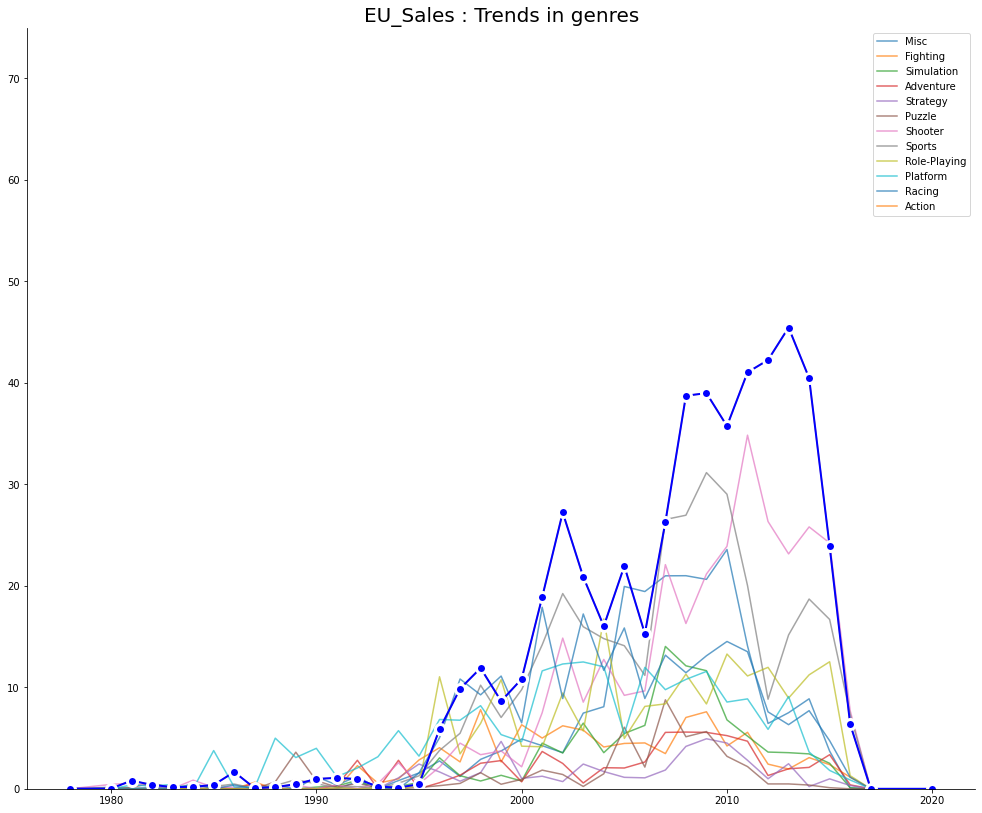

In [52]:
fig= plt.figure(figsize=(17,14))
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
for col in EU_Sales_tmp.columns:
  plt.plot(EU_Sales_tmp[col], alpha=0.7)
plt.legend(EU_Sales_tmp.columns)
plt.ylim(0, 75)

args_plot = [EU_Sales_tmp["Action"]] ## 데이터 인자
config_plot = dict( ## 키워드 인자
    color='blue', # 선 색깔
    linestyle='solid', # 선 스타일
    linewidth=2, # 선 두께 
)
 
ax.plot(marker='o',markersize=10,\
        markeredgecolor='white', markeredgewidth=3,\
        *args_plot,**config_plot) ## 선그래프 생성

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
 
#plt.xticks(np.arange(labels=['', '1980', '', '1990', '', '2000', '', '2010', '', '2020']) 
plt.title('EU_Sales : Trends in genres',fontsize=20) ## 타이틀 설정  # Action 2008년 72.3으로 가장 높음
plt.show()

plt.show()

In [53]:
# 2번 질문 (년도 별 게임의 트렌드)

# 장르에 대한 트렌드

# 장르 하나 뽑고 -> 거기서 년도 하나 뽑아서 -> 그 중에서 NA의 값의 총합으로 묶은 리스트 -> 인데 그것이 년도 하나하나 있는 걸 묶은 리스트 
genre2 = set(df['Genre'])
years = set(df["Year"])  #<- 아까 만듦

genre_list = []

for genr_l in genre2:
  temp_g = df.loc[ df["Genre"]==genr_l]
  y_l = []
  for ye in years:
    temp_y = temp_g.loc[temp_g["Year"]==ye]
    y_l.append(temp_y.sum()["JP_Sales"]) 
  genre_list.append(y_l)

# 전세계
# y_l.append(temp_y.sum()["NA_Sales"] + temp_y.sum()["EU_Sales"] + temp_y.sum()["JP_Sales"] + temp_y.sum()["Others_Sales"])




#for i in range(len(genre_list)):
 # print(genre_list[i])


JP_Sales_tmp = pd.DataFrame(genre_list,columns=years,index=genre2).transpose()
JP_Sales_tmp
#print(len(NA_Sales_tmp))

,Misc,Fighting,Simulation,Adventure,Strategy,Puzzle,Shooter,Sports,Role-Playing,Platform,Racing,Action
1978,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00000,0.00,0.00,0.00
1980,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00000,0.00,0.00,0.00
1981,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00000,0.00,0.00,0.00
1982,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00000,0.00,0.00,0.00
1983,2.13,0.00,0.00,0.00,0.00,0.00,0.00,2.35,0.00000,3.62,0.00,0.00
1984,1.45,0.00,0.00,0.00,0.00,2.23,1.96,4.02,0.00000,0.69,3.09,0.83
1985,0.00,1.05,0.00,0.00,0.00,1.66,0.21,1.53,0.00000,8.67,0.00,1.44
1986,0.00,0.00,0.00,0.00,0.00,0.00,2.77,2.69,0.52000,8.11,0.41,5.31
1987,0.00,1.87,0.00,1.61,0.00,0.00,0.00,3.28,4.18000,0.69,0.00,0.00
1988,0.00,0.00,0.00,0.00,0.00,1.81,0.00,1.86,5.78000,5.70,0.19,0.42


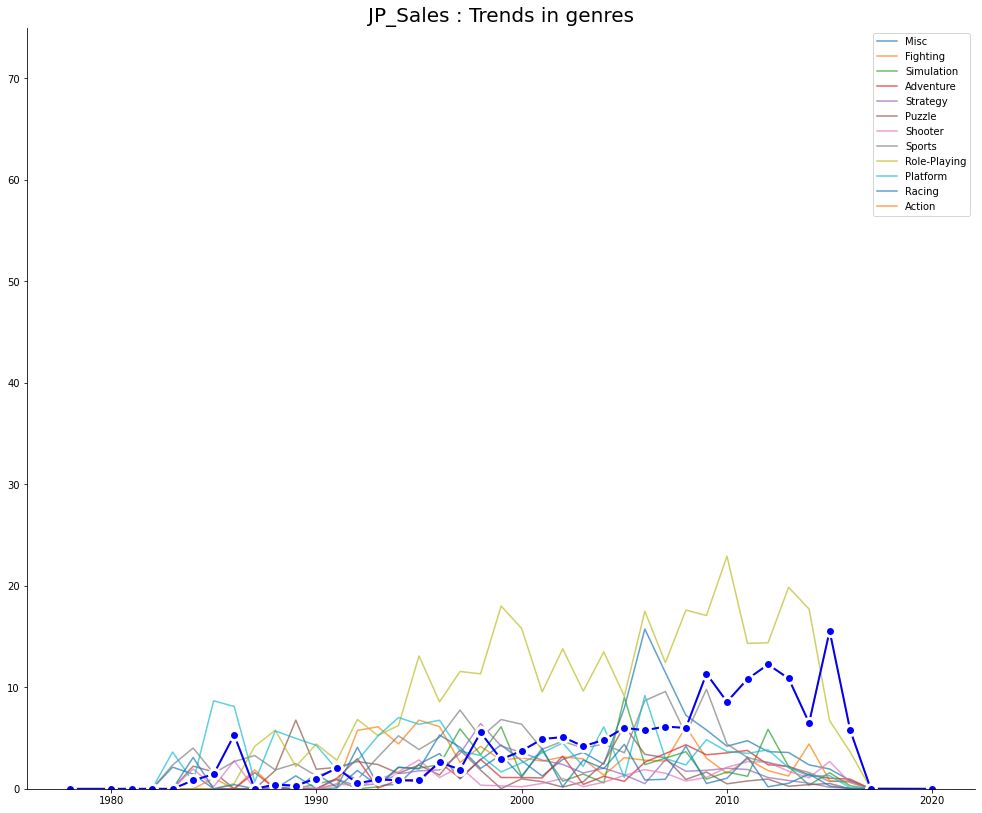

In [54]:
fig= plt.figure(figsize=(17,14))
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
for col in JP_Sales_tmp.columns:
  plt.plot(JP_Sales_tmp[col], alpha=0.7)
plt.legend(JP_Sales_tmp.columns)
plt.ylim(0, 75)

args_plot = [JP_Sales_tmp["Action"]] ## 데이터 인자
config_plot = dict( ## 키워드 인자
    color='blue', # 선 색깔
    linestyle='solid', # 선 스타일
    linewidth=2, # 선 두께 
)
 
ax.plot(marker='o',markersize=10,\
        markeredgecolor='white', markeredgewidth=3,\
        *args_plot,**config_plot) ## 선그래프 생성

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
 
#plt.xticks(np.arange(labels=['', '1980', '', '1990', '', '2000', '', '2010', '', '2020']) 
plt.title('JP_Sales : Trends in genres',fontsize=20) ## 타이틀 설정  # Action 2008년 72.3으로 가장 높음
plt.show()

plt.show()

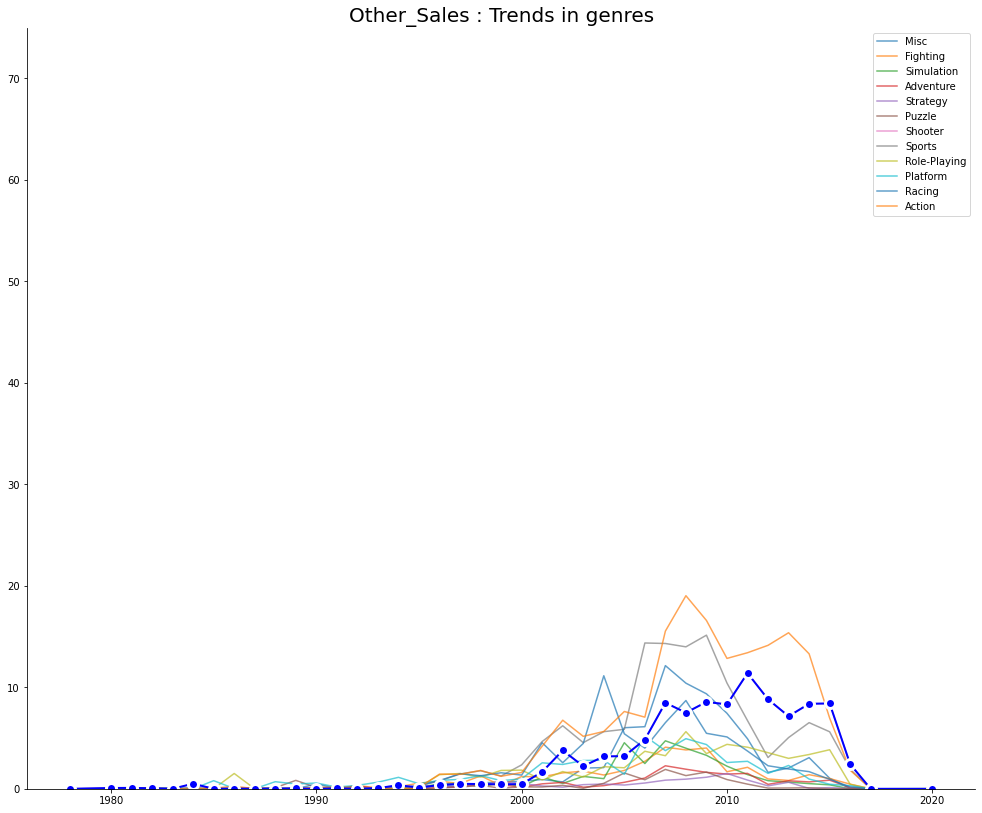

In [55]:
# 2번 질문 (년도 별 게임의 트렌드)

# 장르에 대한 트렌드

# 장르 하나 뽑고 -> 거기서 년도 하나 뽑아서 -> 그 중에서 NA의 값의 총합으로 묶은 리스트 -> 인데 그것이 년도 하나하나 있는 걸 묶은 리스트 
genre2 = set(df['Genre'])
years = set(df["Year"])  #<- 아까 만듦

genre_list = []

for genr_l in genre2:
  temp_g = df.loc[ df["Genre"]==genr_l]
  y_l = []
  for ye in years:
    temp_y = temp_g.loc[temp_g["Year"]==ye]
    y_l.append(temp_y.sum()["Other_Sales"]) 
  genre_list.append(y_l)

# 전세계
# y_l.append(temp_y.sum()["NA_Sales"] + temp_y.sum()["EU_Sales"] + temp_y.sum()["JP_Sales"] + temp_y.sum()["Others_Sales"])




#for i in range(len(genre_list)):
 # print(genre_list[i])


OT_Sales_tmp = pd.DataFrame(genre_list,columns=years,index=genre2).transpose()
OT_Sales_tmp
#print(len(NA_Sales_tmp))

fig= plt.figure(figsize=(17,14))
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
for col in OT_Sales_tmp.columns:
  plt.plot(OT_Sales_tmp[col], alpha=0.7)
plt.legend(OT_Sales_tmp.columns)
plt.ylim(0, 75)

args_plot = [OT_Sales_tmp["Shooter"]] ## 데이터 인자
config_plot = dict( ## 키워드 인자
    color='blue', # 선 색깔
    linestyle='solid', # 선 스타일
    linewidth=2, # 선 두께 
)
 
ax.plot(marker='o',markersize=10,\
        markeredgecolor='white', markeredgewidth=3,\
        *args_plot,**config_plot) ## 선그래프 생성

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
 
#plt.xticks(np.arange(labels=['', '1980', '', '1990', '', '2000', '', '2010', '', '2020']) 
plt.title('Other_Sales : Trends in genres',fontsize=20) ## 타이틀 설정  # Action 2008년 72.3으로 가장 높음
plt.show()

plt.show()

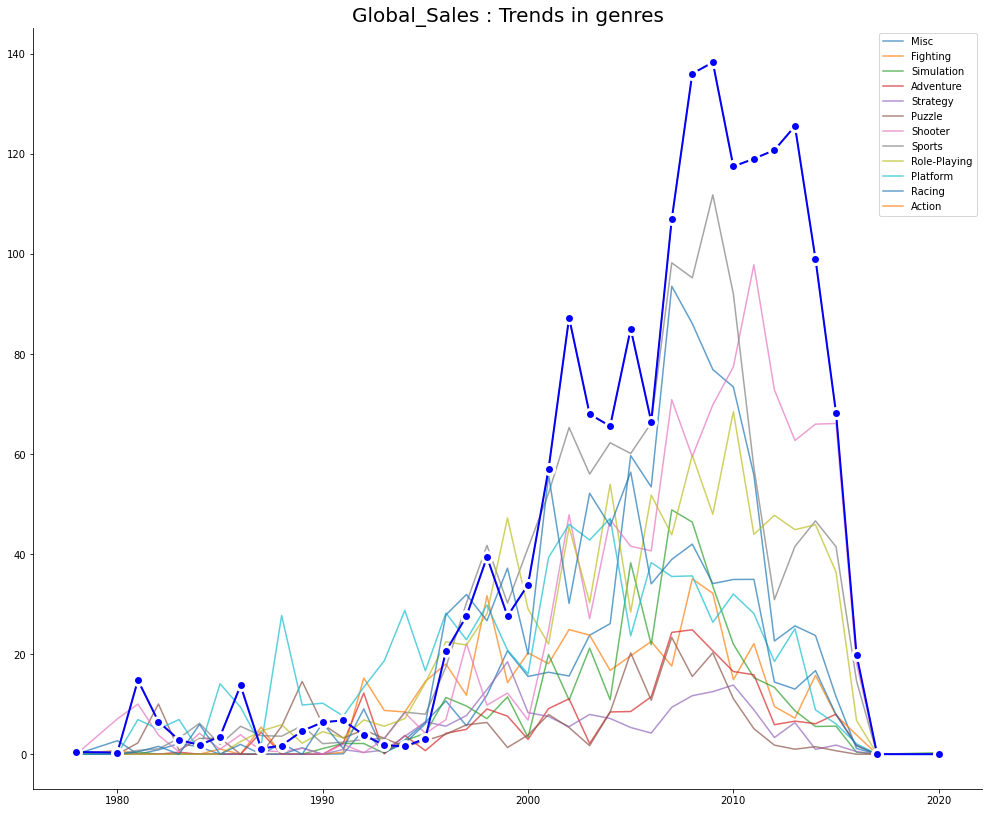

In [56]:
# 2번 질문 (년도 별 게임의 트렌드)

# 장르에 대한 트렌드

# 장르 하나 뽑고 -> 거기서 년도 하나 뽑아서 -> 그 중에서 NA의 값의 총합으로 묶은 리스트 -> 인데 그것이 년도 하나하나 있는 걸 묶은 리스트 
genre2 = set(df['Genre'])
years = set(df["Year"])  #<- 아까 만듦

genre_list = []

for genr_l in genre2:
  temp_g = df.loc[ df["Genre"]==genr_l]
  y_l = []
  for ye in years:
    temp_y = temp_g.loc[temp_g["Year"]==ye]
    y_l.append(temp_y.sum()["Global"]) 
  genre_list.append(y_l)

# 전세계
# y_l.append(temp_y.sum()["NA_Sales"] + temp_y.sum()["EU_Sales"] + temp_y.sum()["JP_Sales"] + temp_y.sum()["Others_Sales"])




#for i in range(len(genre_list)):
 # print(genre_list[i])


Gl_Sales_tmp = pd.DataFrame(genre_list,columns=years,index=genre2).transpose()
Gl_Sales_tmp
#print(len(NA_Sales_tmp))

fig= plt.figure(figsize=(17,14))
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
for col in Gl_Sales_tmp.columns:
  plt.plot(Gl_Sales_tmp[col], alpha=0.7)
plt.legend(Gl_Sales_tmp.columns)


args_plot = [Gl_Sales_tmp["Action"]] ## 데이터 인자
config_plot = dict( ## 키워드 인자
    color='blue', # 선 색깔
    linestyle='solid', # 선 스타일
    linewidth=2, # 선 두께 
)
 
ax.plot(marker='o',markersize=10,\
        markeredgecolor='white', markeredgewidth=3,\
        *args_plot,**config_plot) ## 선그래프 생성

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
 
#plt.xticks(np.arange(labels=['', '1980', '', '1990', '', '2000', '', '2010', '', '2020']) 
plt.title('Global_Sales : Trends in genres',fontsize=20) ## 타이틀 설정  # Action 2008년 72.3으로 가장 높음
plt.show()

plt.show()

In [57]:
# 플랫폼에 대한 트렌드

In [58]:
# 플랫폼 데이터프레임만 추출
df_platform = df[["Platform"]]
df_platform

# 휴대용 게임
portable_list = ['Wii', 'GC', 'XB', 'X360', 'PS', 'PS2', 'PS3', 'PS4', '2600', 'NES', 'SNES', 'DC', 'N64', 'XOne', 'GEN', 'SCD', 'NG', 'TG16', '3DO', 'PCFX', 'PC']
portable = df_platform[~df_platform["Platform"].isin(portable_list)]
portable        # 'DS', 'PSP', '3DS', 'PSP', 'GB', 'GBA', 'PSV' ,'WS', 'GG', 'WiiU', 'SAT'

# 콘솔 게임
console_list = ['DS', 'PSP', '3DS', 'PSP', 'GB', 'GBA', 'PSV' ,'WS', 'GG', 'WiiU', 'SAT']
console = df_platform[~df_platform["Platform"].isin(console_list)]
console         # 'Wii', 'GC', 'XB', 'X360', 'PS', 'PS2', 'PS3', 'PS4', '2600', 'NES', 'SNES', 'DC', 'N64', 'XOne', 'GEN', 'SCD', 'NG', 'TG16', '3DO', 'PCFX', 'PC'

# pc 게임
pc = df_platform.loc[df_platform['Platform'] =='PC']

In [59]:
# NA 플랫폼 트렌드

# 휴대용 게임만 추출
portable2 = df[~df["Platform"].isin(portable_list)]
portable2

# 장르 하나 뽑고 -> 거기서 년도 하나 뽑아서 -> 그 중에서 NA의 값의 총합으로 묶은 리스트 -> 인데 그것이 년도 하나하나 있는 걸 묶은 리스트 
platforms = set(portable2['Platform'])
years = set(df["Year"])  #<- 아까 만듦

platform_list2 = []

for plat_l in platforms:
  temp_p = portable2.loc[ portable2['Platform']==plat_l]
  y_list = []
  for y in years:
    temp_ye = temp_p.loc[temp_p["Year"]==y]
    y_list.append(temp_ye.sum()["NA_Sales"]) 
  platform_list2.append(y_list)

# 전세계
# y_l.append(temp_y.sum()["NA_Sales"] + temp_y.sum()["EU_Sales"] + temp_y.sum()["JP_Sales"] + temp_y.sum()["Others_Sales"])

#for i in range(len(platform_list)):
  #print(platform_list[i])


NA_platporm_t = pd.DataFrame(platform_list2,columns=years,index=platforms).transpose()
NA_platporm_t

,SAT,3DS,DS,WiiU,GB,WS,PSV,GG,GBA,PSP
1978,0.00,0.00,0.000000,0.00,0.000000,0.0,0.00,0.0,0.00,0.00
1980,0.00,0.00,0.000000,0.00,0.000000,0.0,0.00,0.0,0.00,0.00
1981,0.00,0.00,0.000000,0.00,0.000000,0.0,0.00,0.0,0.00,0.00
1982,0.00,0.00,0.000000,0.00,0.000000,0.0,0.00,0.0,0.00,0.00
1983,0.00,0.00,0.000000,0.00,0.000000,0.0,0.00,0.0,0.00,0.00
1984,0.00,0.00,0.000000,0.00,0.000000,0.0,0.00,0.0,0.00,0.00
1985,0.00,0.00,0.000000,0.00,0.000000,0.0,0.00,0.0,0.00,0.00
1986,0.00,0.00,0.000000,0.00,0.000000,0.0,0.00,0.0,0.00,0.00
1987,0.00,0.00,0.000000,0.00,0.000000,0.0,0.00,0.0,0.00,0.00
1988,0.00,0.00,0.000000,0.00,0.820000,0.0,0.00,0.0,0.00,0.00


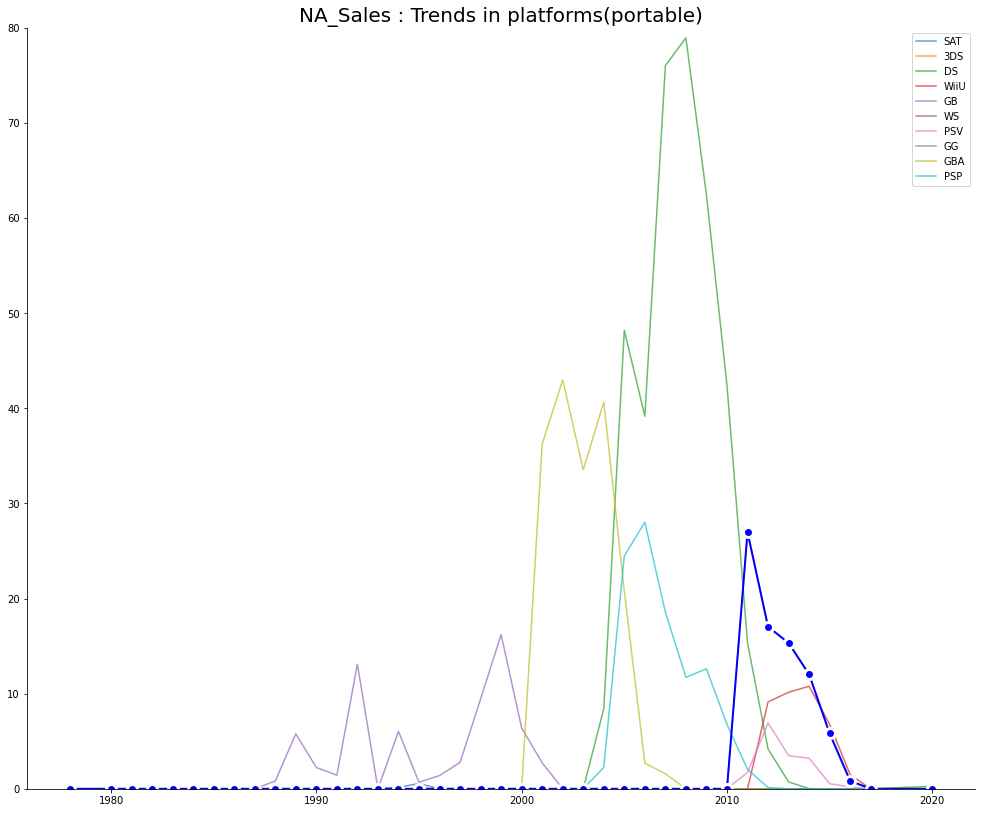

In [60]:
fig= plt.figure(figsize=(17,14))
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
for col in NA_platporm_t.columns:
  plt.plot(NA_platporm_t[col], alpha=0.7)
plt.legend(NA_platporm_t.columns)
plt.ylim(0, 80)

args_plot = [NA_platporm_t["3DS"]] ## 데이터 인자
config_plot = dict( ## 키워드 인자
    color='blue', # 선 색깔
    linestyle='solid', # 선 스타일
    linewidth=2, # 선 두께 
)
 
ax.plot(marker='o',markersize=10,\
        markeredgecolor='white', markeredgewidth=3,\
        *args_plot,**config_plot) ## 선그래프 생성

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
 

plt.title('NA_Sales : Trends in platforms(portable)',fontsize=20) ## 타이틀 설정  # Action 2008년 72.3으로 가장 높음
plt.show()

plt.show()

In [61]:
# EU 플랫폼 트렌드


# 휴대용 게임만 추출
portable2 = df[~df["Platform"].isin(portable_list)]
portable2

# 장르 하나 뽑고 -> 거기서 년도 하나 뽑아서 -> 그 중에서 NA의 값의 총합으로 묶은 리스트 -> 인데 그것이 년도 하나하나 있는 걸 묶은 리스트 
platforms = set(portable2['Platform'])
years = set(df["Year"])  #<- 아까 만듦

eu_platform_list = []

for plat_l in platforms:
  temp_p = portable2.loc[ portable2['Platform']==plat_l]
  y_list = []
  for y in years:
    temp_ye = temp_p.loc[temp_p["Year"]==y]
    y_list.append(temp_ye.sum()["EU_Sales"]) 
  eu_platform_list.append(y_list)

# 전세계
# y_l.append(temp_y.sum()["NA_Sales"] + temp_y.sum()["EU_Sales"] + temp_y.sum()["JP_Sales"] + temp_y.sum()["Others_Sales"])

#for i in range(len(platform_list)):
  #print(platform_list[i])


eu_platporm_t = pd.DataFrame(eu_platform_list,columns=years,index=platforms).transpose()
eu_platporm_t

,SAT,3DS,DS,WiiU,GB,WS,PSV,GG,GBA,PSP
1978,0.00,0.00,0.000000,0.00,0.00,0.0,0.00,0.0,0.00,0.00
1980,0.00,0.00,0.000000,0.00,0.00,0.0,0.00,0.0,0.00,0.00
1981,0.00,0.00,0.000000,0.00,0.00,0.0,0.00,0.0,0.00,0.00
1982,0.00,0.00,0.000000,0.00,0.00,0.0,0.00,0.0,0.00,0.00
1983,0.00,0.00,0.000000,0.00,0.00,0.0,0.00,0.0,0.00,0.00
1984,0.00,0.00,0.000000,0.00,0.00,0.0,0.00,0.0,0.00,0.00
1985,0.00,0.00,0.000000,0.00,0.00,0.0,0.00,0.0,0.00,0.00
1986,0.00,0.00,0.000000,0.00,0.00,0.0,0.00,0.0,0.00,0.00
1987,0.00,0.00,0.000000,0.00,0.00,0.0,0.00,0.0,0.00,0.00
1988,0.00,0.00,0.000000,0.00,0.23,0.0,0.00,0.0,0.00,0.00


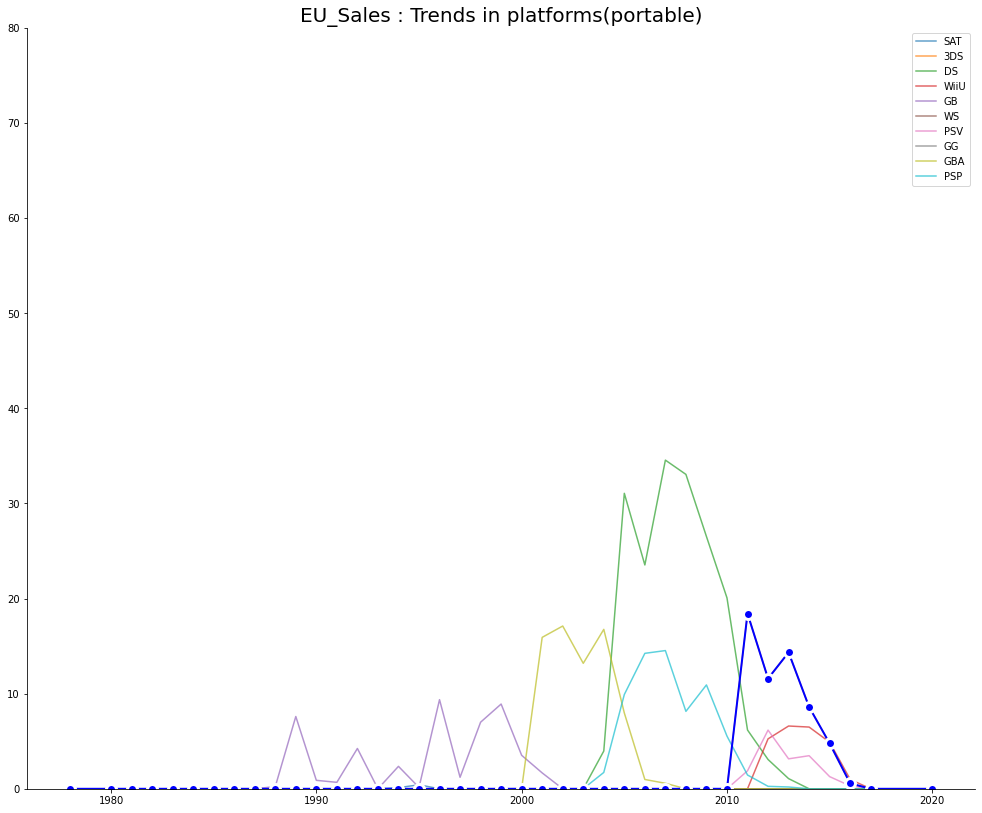

In [62]:
fig= plt.figure(figsize=(17,14))
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
for col in eu_platporm_t.columns:
  plt.plot(eu_platporm_t[col], alpha=0.7)
plt.legend(eu_platporm_t.columns)
plt.ylim(0, 80)

args_plot = [eu_platporm_t["3DS"]] ## 데이터 인자
config_plot = dict( ## 키워드 인자
    color='blue', # 선 색깔
    linestyle='solid', # 선 스타일
    linewidth=2, # 선 두께 
)
 
ax.plot(marker='o',markersize=10,\
        markeredgecolor='white', markeredgewidth=3,\
        *args_plot,**config_plot) ## 선그래프 생성

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
 

plt.title('EU_Sales : Trends in platforms(portable)',fontsize=20) ## 타이틀 설정  # Action 2008년 72.3으로 가장 높음
plt.show()

plt.show()

In [63]:
# JP 플랫폼 트렌드


# 휴대용 게임만 추출
portable2 = df[~df["Platform"].isin(portable_list)]
portable2

# 장르 하나 뽑고 -> 거기서 년도 하나 뽑아서 -> 그 중에서 NA의 값의 총합으로 묶은 리스트 -> 인데 그것이 년도 하나하나 있는 걸 묶은 리스트 
platforms = set(portable2['Platform'])
years = set(df["Year"])  #<- 아까 만듦

jp_platform_list = []

for plat_l in platforms:
  temp_p = portable2.loc[ portable2['Platform']==plat_l]
  y_list = []
  for y in years:
    temp_ye = temp_p.loc[temp_p["Year"]==y]
    y_list.append(temp_ye.sum()["JP_Sales"]) 
  jp_platform_list.append(y_list)

# 전세계
# y_l.append(temp_y.sum()["NA_Sales"] + temp_y.sum()["EU_Sales"] + temp_y.sum()["JP_Sales"] + temp_y.sum()["Others_Sales"])

#for i in range(len(platform_list)):
  #print(platform_list[i])


jp_platporm_t = pd.DataFrame(jp_platform_list,columns=years,index=platforms).transpose()
jp_platporm_t

,SAT,3DS,DS,WiiU,GB,WS,PSV,GG,GBA,PSP
1978,0.00,0.00,0.00,0.00,0.00000,0.00,0.00,0.00,0.00,0.00
1980,0.00,0.00,0.00,0.00,0.00000,0.00,0.00,0.00,0.00,0.00
1981,0.00,0.00,0.00,0.00,0.00000,0.00,0.00,0.00,0.00,0.00
1982,0.00,0.00,0.00,0.00,0.00000,0.00,0.00,0.00,0.00,0.00
1983,0.00,0.00,0.00,0.00,0.00000,0.00,0.00,0.00,0.00,0.00
1984,0.00,0.00,0.00,0.00,0.00000,0.00,0.00,0.00,0.00,0.00
1985,0.00,0.00,0.02,0.00,0.00000,0.00,0.00,0.00,0.00,0.00
1986,0.00,0.00,0.00,0.00,0.00000,0.00,0.00,0.00,0.00,0.00
1987,0.00,0.00,0.00,0.00,0.00000,0.00,0.00,0.00,0.00,0.00
1988,0.00,0.00,0.00,0.00,0.35000,0.00,0.00,0.00,0.00,0.00


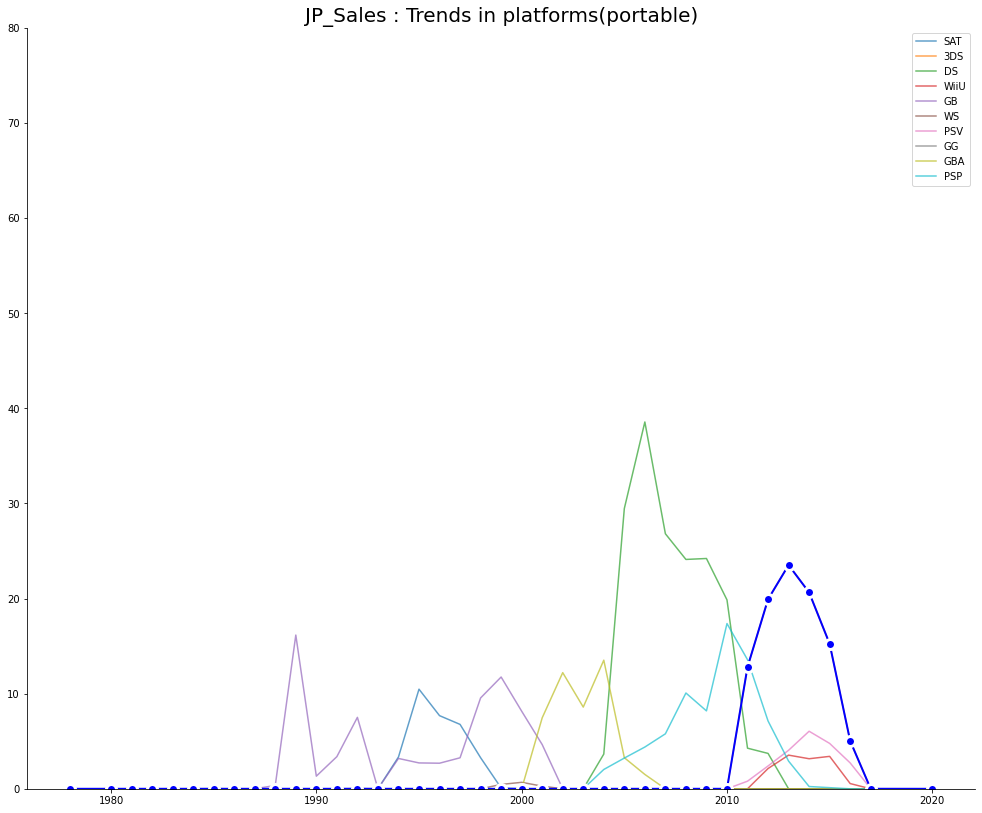

In [64]:
fig= plt.figure(figsize=(17,14))
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
for col in jp_platporm_t.columns:
  plt.plot(jp_platporm_t[col], alpha=0.7)
plt.legend(jp_platporm_t.columns)

plt.ylim(0, 80)
args_plot = [jp_platporm_t["3DS"]] ## 데이터 인자
config_plot = dict( ## 키워드 인자
    color='blue', # 선 색깔
    linestyle='solid', # 선 스타일
    linewidth=2, # 선 두께 
)
 
ax.plot(marker='o',markersize=10,\
        markeredgecolor='white', markeredgewidth=3,\
        *args_plot,**config_plot) ## 선그래프 생성

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
 

plt.title('JP_Sales : Trends in platforms(portable)',fontsize=20) ## 타이틀 설정  # Action 2008년 72.3으로 가장 높음
plt.show()

plt.show()

In [65]:
# other 플랫폼 트렌드


# 휴대용 게임만 추출
portable2 = df[~df["Platform"].isin(portable_list)]
portable2

# 장르 하나 뽑고 -> 거기서 년도 하나 뽑아서 -> 그 중에서 NA의 값의 총합으로 묶은 리스트 -> 인데 그것이 년도 하나하나 있는 걸 묶은 리스트 
platforms = set(portable2['Platform'])
years = set(df["Year"])  #<- 아까 만듦

other_platform_list = []

for plat_l in platforms:
  temp_p = portable2.loc[ portable2['Platform']==plat_l]
  y_list = []
  for y in years:
    temp_ye = temp_p.loc[temp_p["Year"]==y]
    y_list.append(temp_ye.sum()["Other_Sales"]) 
  other_platform_list.append(y_list)

# 전세계
# y_l.append(temp_y.sum()["NA_Sales"] + temp_y.sum()["EU_Sales"] + temp_y.sum()["JP_Sales"] + temp_y.sum()["Others_Sales"])

#for i in range(len(platform_list)):
  #print(platform_list[i])


other_platporm_t = pd.DataFrame(other_platform_list,columns=years,index=platforms).transpose()
other_platporm_t

,SAT,3DS,DS,WiiU,GB,WS,PSV,GG,GBA,PSP
1978,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00
1980,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00
1981,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00
1982,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00
1983,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00
1984,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00
1985,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00
1986,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00
1987,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00
1988,0.00,0.00,0.00,0.00,0.03,0.0,0.00,0.0,0.00,0.00


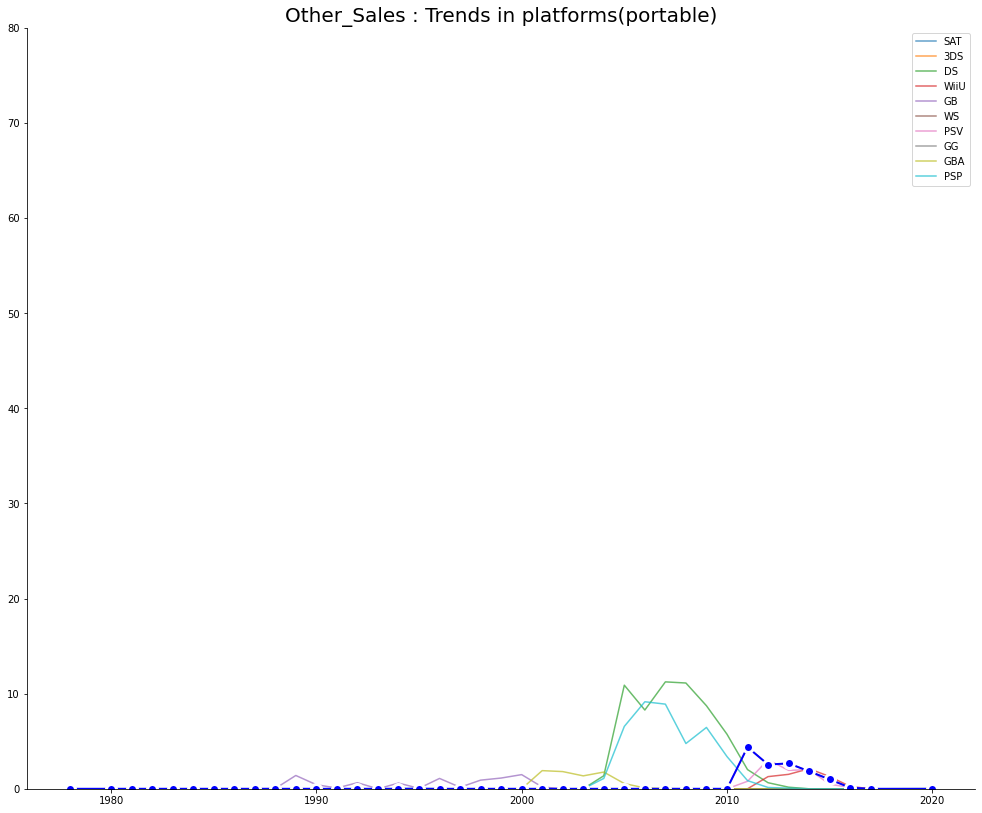

In [66]:
fig= plt.figure(figsize=(17,14))
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
for col in other_platporm_t.columns:
  plt.plot(other_platporm_t[col], alpha=0.7)
plt.legend(other_platporm_t.columns)

plt.ylim(0, 80)
args_plot = [other_platporm_t["3DS"]] ## 데이터 인자
config_plot = dict( ## 키워드 인자
    color='blue', # 선 색깔
    linestyle='solid', # 선 스타일
    linewidth=2, # 선 두께 
)
 
ax.plot(marker='o',markersize=10,\
        markeredgecolor='white', markeredgewidth=3,\
        *args_plot,**config_plot) ## 선그래프 생성

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
 

plt.title('Other_Sales : Trends in platforms(portable)',fontsize=20) ## 타이틀 설정  # Action 2008년 72.3으로 가장 높음
plt.show()

plt.show()

In [67]:
# global 플랫폼 트렌드


# 휴대용 게임만 추출
portable2 = df[~df["Platform"].isin(portable_list)]
portable2

# 장르 하나 뽑고 -> 거기서 년도 하나 뽑아서 -> 그 중에서 NA의 값의 총합으로 묶은 리스트 -> 인데 그것이 년도 하나하나 있는 걸 묶은 리스트 
platforms = set(portable2['Platform'])
years = set(df["Year"])  #<- 아까 만듦

global_platform_list = []

for plat_l in platforms:
  temp_p = portable2.loc[ portable2['Platform']==plat_l]
  y_list = []
  for y in years:
    temp_ye = temp_p.loc[temp_p["Year"]==y]
    y_list.append(temp_ye.sum()["Global"]) 
  global_platform_list.append(y_list)

# 전세계
# y_l.append(temp_y.sum()["NA_Sales"] + temp_y.sum()["EU_Sales"] + temp_y.sum()["JP_Sales"] + temp_y.sum()["Others_Sales"])

#for i in range(len(platform_list)):
  #print(platform_list[i])


global_platporm_t = pd.DataFrame(global_platform_list,columns=years,index=platforms).transpose()
global_platporm_t

,SAT,3DS,DS,WiiU,GB,WS,PSV,GG,GBA,PSP
1978,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00
1980,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00
1981,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00
1982,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00
1983,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00
1984,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00
1985,0.00,0.00,0.020000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00
1986,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00
1987,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00
1988,0.00,0.00,0.000000,0.00,1.430000,0.00,0.00,0.00,0.00,0.00


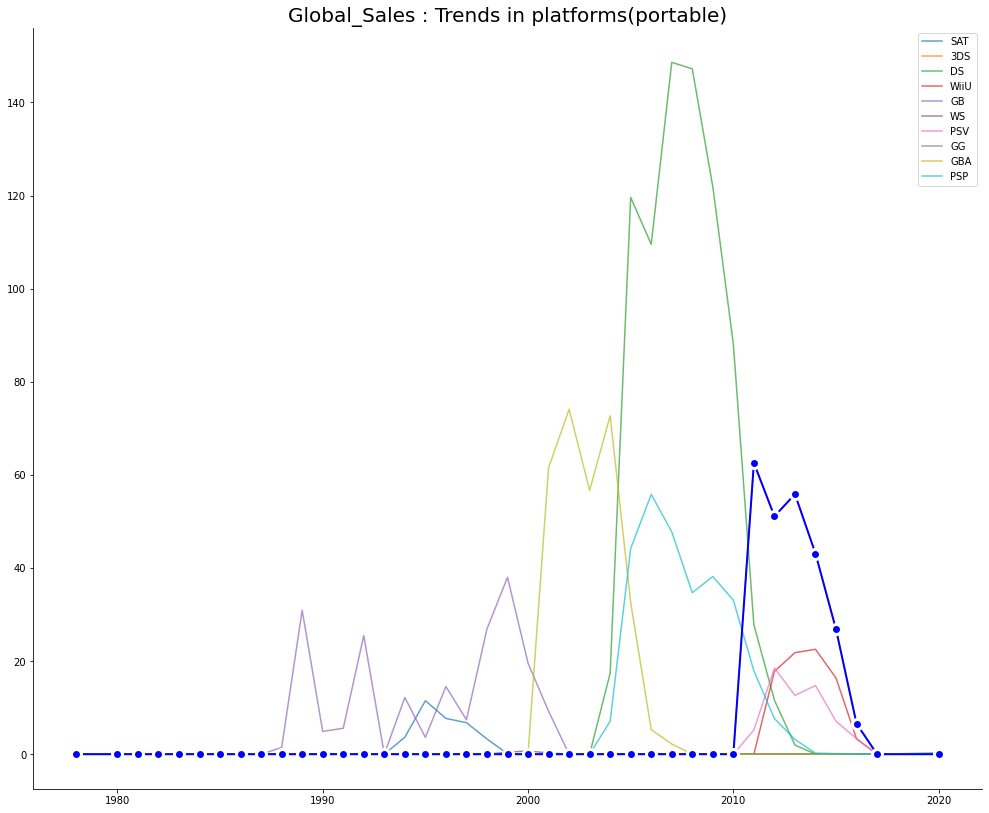

In [68]:
fig= plt.figure(figsize=(17,14))
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
for col in global_platporm_t.columns:
  plt.plot(global_platporm_t[col], alpha=0.7)
plt.legend(global_platporm_t.columns)


args_plot = [global_platporm_t["3DS"]] ## 데이터 인자
config_plot = dict( ## 키워드 인자
    color='blue', # 선 색깔
    linestyle='solid', # 선 스타일
    linewidth=2, # 선 두께 
)
 
ax.plot(marker='o',markersize=10,\
        markeredgecolor='white', markeredgewidth=3,\
        *args_plot,**config_plot) ## 선그래프 생성

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
 

plt.title('Global_Sales : Trends in platforms(portable)',fontsize=20) ## 타이틀 설정  # Action 2008년 72.3으로 가장 높음
plt.show()

plt.show()

# DS 최댓값 150 가까이 감

In [69]:
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [70]:
# NA 콘솔 플랫폼 트렌드



portable3 = df[~df["Platform"].isin(console_list)]
portable3



# 장르 하나 뽑고 -> 거기서 년도 하나 뽑아서 -> 그 중에서 NA의 값의 총합으로 묶은 리스트 -> 인데 그것이 년도 하나하나 있는 걸 묶은 리스트 
platforms = set(portable3['Platform'])
years = set(df["Year"])  #<- 아까 만듦

platform_list3 = []

for form_l in platforms:
  temp_p = portable3.loc[ portable3['Platform']==form_l]
  y_list = []
  for y in years:
    temp_ye = temp_p.loc[temp_p["Year"]==y]
    y_list.append(temp_ye.sum()["NA_Sales"]) 
  platform_list3.append(y_list)

# 전세계
# y_l.append(temp_y.sum()["NA_Sales"] + temp_y.sum()["EU_Sales"] + temp_y.sum()["JP_Sales"] + temp_y.sum()["Others_Sales"])

#for i in range(len(platform_list)):
  #print(platform_list[i])


NA_platform_t = pd.DataFrame(platform_list3 ,columns=years,index=platforms).transpose()
NA_platform_t

,NG,NES,PCFX,Wii,GC,PS4,SCD,TG16,PC,SNES,...,PS3,PS,XB,2600,3DO,DC,N64,GEN,X360,PS2
1978,0.0,0.000000,0.0,0.000000,0.00,0.00,0.0,0.0,0.00,0.000000,...,0.00,0.00,0.00,0.42,0.0,0.00,0.00,0.00,0.000000,0.00
1980,0.0,0.000000,0.0,0.000000,0.00,0.00,0.0,0.0,0.00,0.000000,...,0.00,0.00,0.00,10.13,0.0,0.00,0.00,0.00,0.000000,0.00
1981,0.0,0.000000,0.0,0.000000,0.00,0.00,0.0,0.0,0.00,0.000000,...,0.00,0.00,0.00,33.40,0.0,0.00,0.00,0.00,0.000000,0.00
1982,0.0,0.000000,0.0,0.000000,0.00,0.00,0.0,0.0,0.00,0.000000,...,0.00,0.00,0.00,26.92,0.0,0.00,0.00,0.00,0.000000,0.00
1983,0.0,2.320000,0.0,0.000000,0.00,0.00,0.0,0.0,0.00,0.000000,...,0.00,0.00,0.00,5.44,0.0,0.00,0.00,0.00,0.000000,0.00
1984,0.0,6.090027,0.0,0.000000,0.00,0.00,0.0,0.0,0.00,0.000000,...,0.00,0.00,0.00,0.26,0.0,0.00,0.00,0.00,0.000000,0.00
1985,0.0,4.230029,0.0,0.000000,0.00,0.00,0.0,0.0,0.00,0.000000,...,0.00,0.00,0.00,0.42,0.0,0.00,0.00,0.00,0.000000,0.00
1986,0.0,11.870000,0.0,0.000000,0.00,0.00,0.0,0.0,0.00,0.000000,...,0.00,0.00,0.00,0.63,0.0,0.00,0.00,0.00,0.000000,0.00
1987,0.0,6.620000,0.0,0.000000,0.00,0.00,0.0,0.0,0.00,0.000000,...,0.00,0.00,0.00,1.84,0.0,0.00,0.00,0.00,0.000000,0.00
1988,0.0,22.360000,0.0,0.000000,0.00,0.00,0.0,0.0,0.00,0.000000,...,0.00,0.00,0.00,0.69,0.0,0.00,0.00,0.00,0.000000,0.00


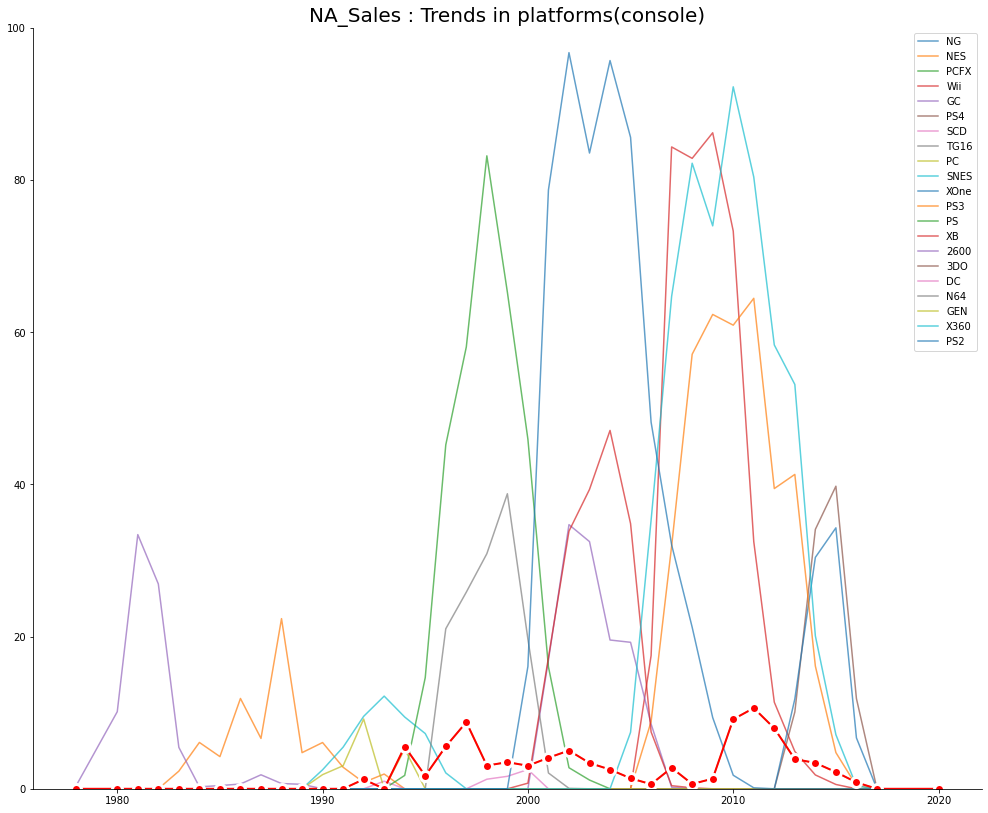

In [71]:
fig= plt.figure(figsize=(17,14))
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
for col in NA_platform_t.columns:
  plt.plot(NA_platform_t[col], alpha=0.7)
plt.legend(NA_platform_t.columns)
plt.ylim(0, 100)

args_plot = [NA_platform_t["PC"]] ## 데이터 인자
config_plot = dict( ## 키워드 인자
    color='red', # 선 색깔
    linestyle='solid', # 선 스타일
    linewidth=2, # 선 두께 
)
 
ax.plot(marker='o',markersize=10,\
        markeredgecolor='white', markeredgewidth=3,\
        *args_plot,**config_plot) ## 선그래프 생성

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
 

plt.title('NA_Sales : Trends in platforms(console)',fontsize=20) ## 타이틀 설정  # Action 2008년 72.3으로 가장 높음
plt.show()

plt.show()

# 편의상 PC 굵은 선으로, PS4가 2010년 이후 가장 많이 팔렸고, XOne이 두번째로 많이 팔림

In [72]:
# EU 콘솔 플랫폼 트렌드



portable3 = df[~df["Platform"].isin(console_list)]
portable3



# 장르 하나 뽑고 -> 거기서 년도 하나 뽑아서 -> 그 중에서 NA의 값의 총합으로 묶은 리스트 -> 인데 그것이 년도 하나하나 있는 걸 묶은 리스트 
platforms = set(portable3['Platform'])
years = set(df["Year"])  #<- 아까 만듦

eu_console_list = []

for form_l in platforms:
  temp_p = portable3.loc[ portable3['Platform']==form_l]
  y_list = []
  for y in years:
    temp_ye = temp_p.loc[temp_p["Year"]==y]
    y_list.append(temp_ye.sum()["EU_Sales"]) 
  eu_console_list.append(y_list)

# 전세계
# y_l.append(temp_y.sum()["NA_Sales"] + temp_y.sum()["EU_Sales"] + temp_y.sum()["JP_Sales"] + temp_y.sum()["Others_Sales"])

#for i in range(len(platform_list)):
  #print(platform_list[i])


eu_console_t = pd.DataFrame(eu_console_list ,columns=years,index=platforms).transpose()
eu_console_t

,NG,NES,PCFX,Wii,GC,PS4,SCD,TG16,PC,SNES,...,PS3,PS,XB,2600,3DO,DC,N64,GEN,X360,PS2
1978,0.0,0.00,0.0,0.000000,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.02,0.0,0.00,0.00,0.00,0.00,0.00
1980,0.0,0.00,0.0,0.000000,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00
1981,0.0,0.00,0.0,0.000000,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,1.96,0.0,0.00,0.00,0.00,0.00,0.00
1982,0.0,0.00,0.0,0.000000,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,1.65,0.0,0.00,0.00,0.00,0.00,0.00
1983,0.0,0.46,0.0,0.000000,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.34,0.0,0.00,0.00,0.00,0.00,0.00
1984,0.0,2.09,0.0,0.000000,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.01,0.0,0.00,0.00,0.00,0.00,0.00
1985,0.0,4.68,0.0,0.000000,0.00,0.00,0.00,0.0,0.03,0.00,...,0.00,0.00,0.00,0.03,0.0,0.00,0.00,0.00,0.00,0.00
1986,0.0,2.80,0.0,0.000000,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.04,0.0,0.00,0.00,0.00,0.00,0.00
1987,0.0,1.32,0.0,0.000000,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.09,0.0,0.00,0.00,0.00,0.00,0.00
1988,0.0,6.30,0.0,0.000000,0.00,0.00,0.00,0.0,0.02,0.00,...,0.00,0.00,0.00,0.04,0.0,0.00,0.00,0.00,0.00,0.00


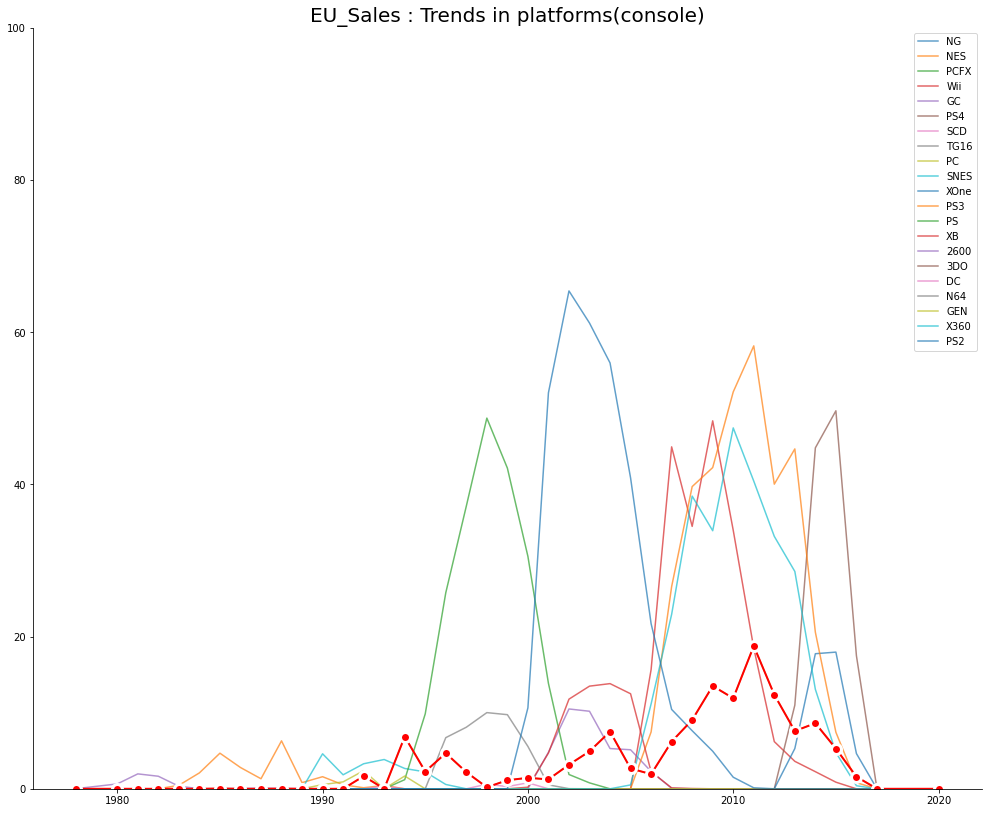

In [73]:
fig= plt.figure(figsize=(17,14))
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
for col in eu_console_t.columns:
  plt.plot(eu_console_t[col], alpha=0.7)
plt.legend(eu_console_t.columns)
plt.ylim(0, 100)

args_plot = [eu_console_t["PC"]] ## 데이터 인자
config_plot = dict( ## 키워드 인자
    color='red', # 선 색깔
    linestyle='solid', # 선 스타일
    linewidth=2, # 선 두께 
)
 
ax.plot(marker='o',markersize=10,\
        markeredgecolor='white', markeredgewidth=3,\
        *args_plot,**config_plot) ## 선그래프 생성

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
 

plt.title('EU_Sales : Trends in platforms(console)',fontsize=20) ## 타이틀 설정  # Action 2008년 72.3으로 가장 높음
plt.show()

plt.show()

# 편의상 PC 굵은 선으로, 이번에도 PS4가 2010년 이후 가장 많이 팔림

In [74]:
# JP 콘솔 플랫폼 트렌드



portable3 = df[~df["Platform"].isin(console_list)]
portable3



# 장르 하나 뽑고 -> 거기서 년도 하나 뽑아서 -> 그 중에서 NA의 값의 총합으로 묶은 리스트 -> 인데 그것이 년도 하나하나 있는 걸 묶은 리스트 
platforms = set(portable3['Platform'])
years = set(df["Year"])  #<- 아까 만듦

jp_console_list = []

for form_l in platforms:
  temp_p = portable3.loc[ portable3['Platform']==form_l]
  y_list = []
  for y in years:
    temp_ye = temp_p.loc[temp_p["Year"]==y]
    y_list.append(temp_ye.sum()["JP_Sales"]) 
  jp_console_list.append(y_list)

# 전세계
# y_l.append(temp_y.sum()["NA_Sales"] + temp_y.sum()["EU_Sales"] + temp_y.sum()["JP_Sales"] + temp_y.sum()["Others_Sales"])

#for i in range(len(platform_list)):
  #print(platform_list[i])


jp_console_t = pd.DataFrame(jp_console_list ,columns=years,index=platforms).transpose()
jp_console_t

,NG,NES,PCFX,Wii,GC,PS4,SCD,TG16,PC,SNES,...,PS3,PS,XB,2600,3DO,DC,N64,GEN,X360,PS2
1978,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1980,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1981,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1982,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1983,0.00,8.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.00,14.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.00,14.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1986,0.00,19.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1987,0.00,11.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.00,15.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00


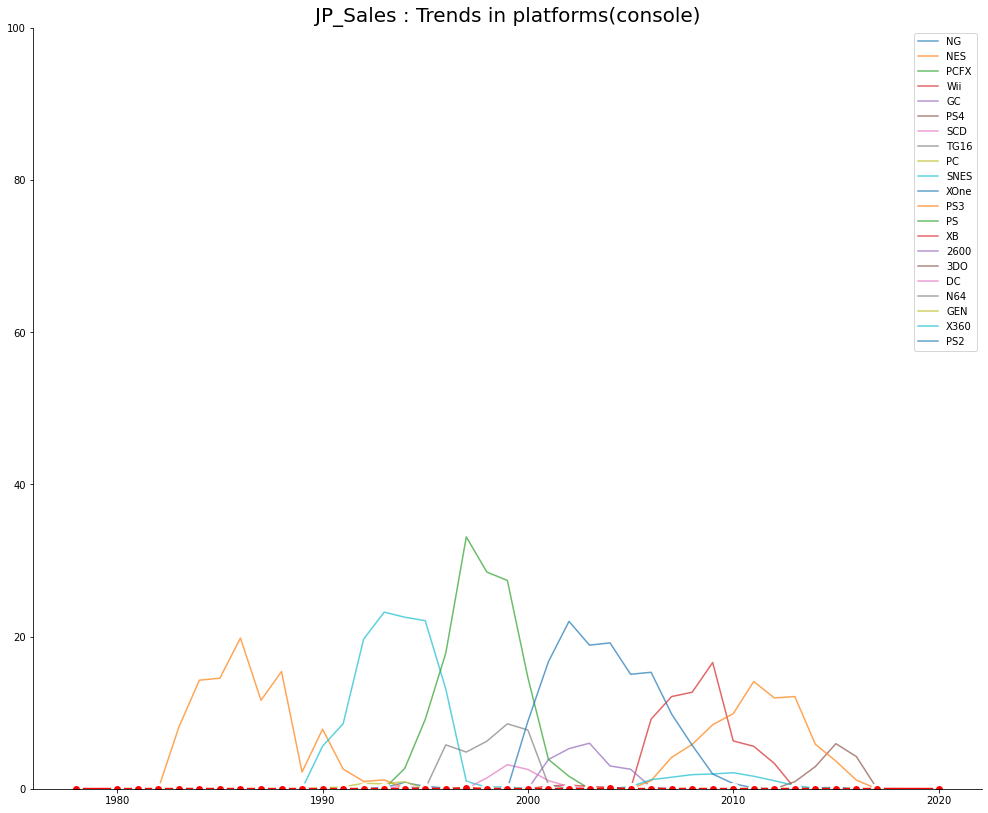

In [75]:
fig= plt.figure(figsize=(17,14))
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
for col in jp_console_t.columns:
  plt.plot(jp_console_t[col], alpha=0.7)
plt.legend(jp_console_t.columns)
plt.ylim(0, 100)

args_plot = [jp_console_t["PC"]] ## 데이터 인자
config_plot = dict( ## 키워드 인자
    color='red', # 선 색깔
    linestyle='solid', # 선 스타일
    linewidth=2, # 선 두께 
)
 
ax.plot(marker='o',markersize=10,\
        markeredgecolor='white', markeredgewidth=3,\
        *args_plot,**config_plot) ## 선그래프 생성

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
 

plt.title('JP_Sales : Trends in platforms(console)',fontsize=20) ## 타이틀 설정  # Action 2008년 72.3으로 가장 높음
plt.show()

plt.show()

# 편의상 PC 굵은 선으로, 이번에도 PS4가 2010년 이후 가장 많이 팔림

In [76]:
# Other 콘솔 플랫폼 트렌드



portable3 = df[~df["Platform"].isin(console_list)]
portable3



# 장르 하나 뽑고 -> 거기서 년도 하나 뽑아서 -> 그 중에서 NA의 값의 총합으로 묶은 리스트 -> 인데 그것이 년도 하나하나 있는 걸 묶은 리스트 
platforms = set(portable3['Platform'])
years = set(df["Year"])  #<- 아까 만듦

other_console_list = []

for form_l in platforms:
  temp_p = portable3.loc[ portable3['Platform']==form_l]
  y_list = []
  for y in years:
    temp_ye = temp_p.loc[temp_p["Year"]==y]
    y_list.append(temp_ye.sum()["Other_Sales"]) 
  other_console_list.append(y_list)

# 전세계
# y_l.append(temp_y.sum()["NA_Sales"] + temp_y.sum()["EU_Sales"] + temp_y.sum()["JP_Sales"] + temp_y.sum()["Others_Sales"])

#for i in range(len(platform_list)):
  #print(platform_list[i])


other_console_t = pd.DataFrame(other_console_list ,columns=years,index=platforms).transpose()
other_console_t

,NG,NES,PCFX,Wii,GC,PS4,SCD,TG16,PC,SNES,...,PS3,PS,XB,2600,3DO,DC,N64,GEN,X360,PS2
1978,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.000000
1980,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.11,0.0,0.00,0.00,0.00,0.00,0.000000
1981,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.32,0.0,0.00,0.00,0.00,0.00,0.000000
1982,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.31,0.0,0.00,0.00,0.00,0.00,0.000000
1983,0.0,0.08,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.06,0.0,0.00,0.00,0.00,0.00,0.000000
1984,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.000000
1985,0.0,0.91,0.0,0.00,0.00,0.00,0.00,0.0,0.01,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.000000
1986,0.0,1.93,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.000000
1987,0.0,0.19,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.01,0.0,0.00,0.00,0.00,0.00,0.000000
1988,0.0,0.94,0.0,0.00,0.00,0.00,0.00,0.0,0.01,0.00,...,0.00,0.00,0.00,0.01,0.0,0.00,0.00,0.00,0.00,0.000000


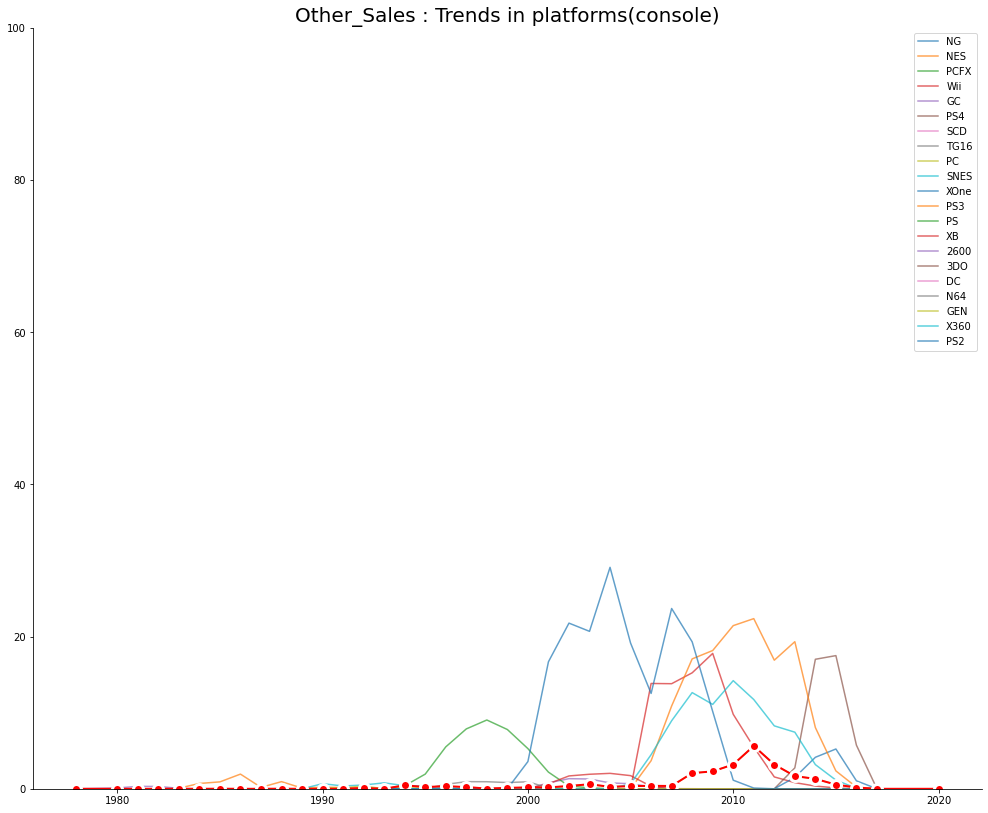

In [77]:
fig= plt.figure(figsize=(17,14))
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
for col in other_console_t.columns:
  plt.plot(other_console_t[col], alpha=0.7)
plt.legend(other_console_t.columns)
plt.ylim(0, 100)

args_plot = [other_console_t["PC"]] ## 데이터 인자
config_plot = dict( ## 키워드 인자
    color='red', # 선 색깔
    linestyle='solid', # 선 스타일
    linewidth=2, # 선 두께 
)
 
ax.plot(marker='o',markersize=10,\
        markeredgecolor='white', markeredgewidth=3,\
        *args_plot,**config_plot) ## 선그래프 생성

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
 

plt.title('Other_Sales : Trends in platforms(console)',fontsize=20) ## 타이틀 설정  # Action 2008년 72.3으로 가장 높음
plt.show()

plt.show()

# 편의상 PC 굵은 선으로, 이번에도 PS4가 2010년 이후 가장 많이 팔림

In [78]:
# global 콘솔 플랫폼 트렌드



portable3 = df[~df["Platform"].isin(console_list)]
portable3



# 장르 하나 뽑고 -> 거기서 년도 하나 뽑아서 -> 그 중에서 NA의 값의 총합으로 묶은 리스트 -> 인데 그것이 년도 하나하나 있는 걸 묶은 리스트 
platforms = set(portable3['Platform'])
years = set(df["Year"])  #<- 아까 만듦

global_console_list = []

for form_l in platforms:
  temp_p = portable3.loc[ portable3['Platform']==form_l]
  y_list = []
  for y in years:
    temp_ye = temp_p.loc[temp_p["Year"]==y]
    y_list.append(temp_ye.sum()["Global"]) 
  global_console_list.append(y_list)

# 전세계
# y_l.append(temp_y.sum()["NA_Sales"] + temp_y.sum()["EU_Sales"] + temp_y.sum()["JP_Sales"] + temp_y.sum()["Others_Sales"])

#for i in range(len(platform_list)):
  #print(platform_list[i])


global_console_t = pd.DataFrame(global_console_list ,columns=years,index=platforms).transpose()
global_console_t

,NG,NES,PCFX,Wii,GC,PS4,SCD,TG16,PC,SNES,...,PS3,PS,XB,2600,3DO,DC,N64,GEN,X360,PS2
1978,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,...,0.00,0.00,0.00,0.44,0.00,0.00,0.00,0.00,0.000000,0.000000
1980,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,...,0.00,0.00,0.00,10.88,0.00,0.00,0.00,0.00,0.000000,0.000000
1981,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,...,0.00,0.00,0.00,35.68,0.00,0.00,0.00,0.00,0.000000,0.000000
1982,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,...,0.00,0.00,0.00,28.88,0.00,0.00,0.00,0.00,0.000000,0.000000
1983,0.00,10.960000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,...,0.00,0.00,0.00,5.84,0.00,0.00,0.00,0.00,0.000000,0.000000
1984,0.00,23.150027,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,...,0.00,0.00,0.00,0.27,0.00,0.00,0.00,0.00,0.000000,0.000000
1985,0.00,24.360029,0.00,0.000000,0.00,0.00,0.00,0.00,0.04,0.000000,...,0.00,0.00,0.00,0.45,0.00,0.00,0.00,0.00,0.000000,0.000000
1986,0.00,36.410000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,...,0.00,0.00,0.00,0.67,0.00,0.00,0.00,0.00,0.000000,0.000000
1987,0.00,19.760000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,...,0.00,0.00,0.00,1.94,0.00,0.00,0.00,0.00,0.000000,0.000000
1988,0.00,45.010000,0.00,0.000000,0.00,0.00,0.00,0.00,0.03,0.000000,...,0.00,0.00,0.00,0.74,0.00,0.00,0.00,0.00,0.000000,0.000000


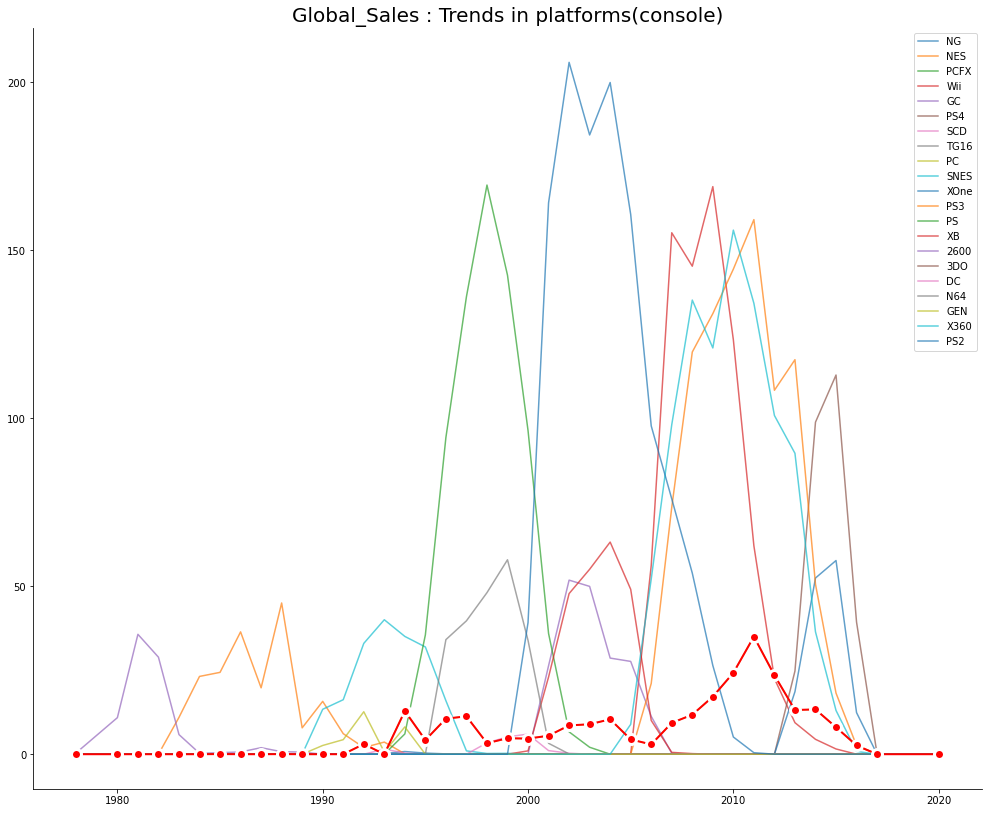

In [79]:
fig= plt.figure(figsize=(17,14))
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
for col in global_console_t.columns:
  plt.plot(global_console_t[col], alpha=0.7)
plt.legend(global_console_t.columns)
#plt.ylim(0, 100)

args_plot = [global_console_t["PC"]] ## 데이터 인자
config_plot = dict( ## 키워드 인자
    color='red', # 선 색깔
    linestyle='solid', # 선 스타일
    linewidth=2, # 선 두께 
)
 
ax.plot(marker='o',markersize=10,\
        markeredgecolor='white', markeredgewidth=3,\
        *args_plot,**config_plot) ## 선그래프 생성

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
 

plt.title('Global_Sales : Trends in platforms(console)',fontsize=20) ## 타이틀 설정  # Action 2008년 72.3으로 가장 높음
plt.show()

plt.show()

# 편의상 PC 굵은 선으로, 이번에도 PS4가 2010년 이후 가장 많이 팔림

In [80]:
# 3번 질문

# set: 집합 // 중복이 없는 리스트 비슷한 녀석 ->> 똑같은 거 잇으면 무시함
platform3 = set(df["Platform"])
#print(df["Genre"])
#print(Genres)

## 데이터 저장할 빈 리스트 선언
p_tmp_list =[]

# for문으로 반복하기, Genres에 있는 거를 gen에 넣어서 매번 반복
# 앞에 칸 비워서 괄호 대신 잊지말것 
for plat in platform3:
  # 장르에 맞는 데이터 불러오기
  p_frame = df.loc[ df["Platform"]==plat]

  # len 명령, length :: 데이터 길이, 데이터가 몇개나 있는지 혹은 row가 몇개인지 즉 데이터 갯수
  length = len(p_frame)

  #print(tmp_frame)
  #print(round(tmp_frame.sum() / length, 2))

  # 평균 계산할때 직접 갯수 넣지말고, 갯수를 len 함수로 불러와서 평균 계산
  p_value=round(p_frame['NA_Sales'].sum() / length, 2)
  #print(tmp_value[0])

  # 계산한 평균을 만들어둔 리스트에 저장, 이때 tmp_value 데이터 프레임 형태여서, [0]을 써서 0번째 인덱스인 실제 값만 저장
  p_tmp_list.append(p_value)

print(p_tmp_list)
print(platform3)

[0.0, 0.16, 0.0, 0.71, 0.0, 0.31, 0.24, 0.29, 0.17, 0.0, 0.18, 0.71, 0.1, 0.2, 0.23, 0.39, 0.3, 0.28, 0.23, 0.71, 0.7, 0.0, 0.27, 0.0, 0.04, 0.0, 0.1, 0.44, 0.09, 0.47, 0.27]
{'SAT', '3DS', 'NG', 'NES', 'PCFX', 'Wii', 'GC', 'PS4', 'SCD', 'TG16', 'DS', 'GEN', 'PC', 'SNES', 'GBA', 'XOne', 'PS3', 'PS', 'XB', 'GB', '2600', '3DO', 'WiiU', 'WS', 'PSV', 'GG', 'DC', 'N64', 'PSP', 'X360', 'PS2'}


In [81]:
# 2번 질문 (년도 별 게임의 트렌드)

# 장르에 대한 트렌드

# 장르 하나 뽑고 -> 거기서 년도 하나 뽑아서 -> 그 중에서 NA의 값의 총합으로 묶은 리스트 -> 인데 그것이 년도 하나하나 있는 걸 묶은 리스트 
platforms = set(df['Platform'])
years = set(df["Year"])  #<- 아까 만듦

platform_list = []

for plat_l in platforms:
  temp_p = df.loc[ df['Platform']==plat_l]
  y_list = []
  for y in years:
    temp_ye = temp_p.loc[temp_p["Year"]==y]
    y_list.append(temp_ye.sum()["NA_Sales"]) 
  platform_list.append(y_list)

# 전세계
# y_l.append(temp_y.sum()["NA_Sales"] + temp_y.sum()["EU_Sales"] + temp_y.sum()["JP_Sales"] + temp_y.sum()["Others_Sales"])

#for i in range(len(platform_list)):
  #print(platform_list[i])


NA_platporm_tmp = pd.DataFrame(platform_list,columns=years,index=platforms).transpose()
NA_platporm_tmp

,SAT,3DS,NG,NES,PCFX,Wii,GC,PS4,SCD,TG16,...,3DO,WiiU,WS,PSV,GG,DC,N64,PSP,X360,PS2
1978,0.00,0.00,0.0,0.000000,0.0,0.000000,0.00,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.000000,0.00
1980,0.00,0.00,0.0,0.000000,0.0,0.000000,0.00,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.000000,0.00
1981,0.00,0.00,0.0,0.000000,0.0,0.000000,0.00,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.000000,0.00
1982,0.00,0.00,0.0,0.000000,0.0,0.000000,0.00,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.000000,0.00
1983,0.00,0.00,0.0,2.320000,0.0,0.000000,0.00,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.000000,0.00
1984,0.00,0.00,0.0,6.090027,0.0,0.000000,0.00,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.000000,0.00
1985,0.00,0.00,0.0,4.230029,0.0,0.000000,0.00,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.000000,0.00
1986,0.00,0.00,0.0,11.870000,0.0,0.000000,0.00,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.000000,0.00
1987,0.00,0.00,0.0,6.620000,0.0,0.000000,0.00,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.000000,0.00
1988,0.00,0.00,0.0,22.360000,0.0,0.000000,0.00,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.000000,0.00


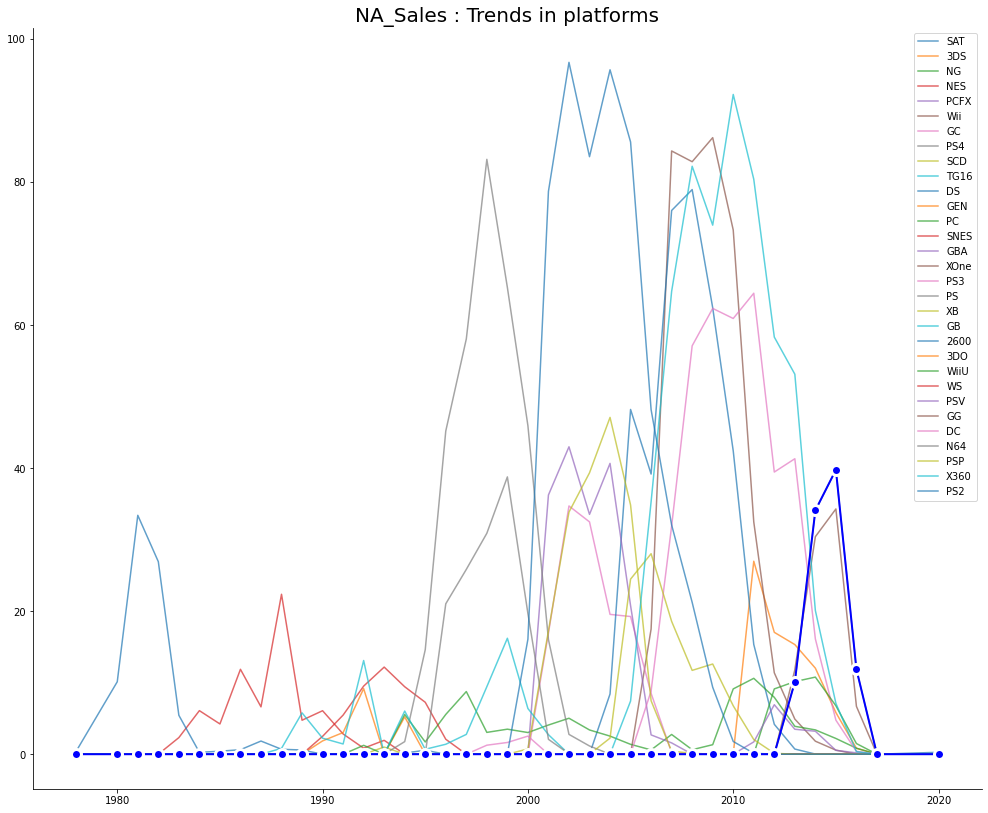

In [82]:
fig= plt.figure(figsize=(17,14))
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
for col in NA_platporm_tmp.columns:
  plt.plot(NA_platporm_tmp[col], alpha=0.7)
plt.legend(NA_platporm_tmp.columns)


args_plot = [NA_platporm_tmp["PS4"]] ## 데이터 인자
config_plot = dict( ## 키워드 인자
    color='blue', # 선 색깔
    linestyle='solid', # 선 스타일
    linewidth=2, # 선 두께 
)
 
ax.plot(marker='o',markersize=10,\
        markeredgecolor='white', markeredgewidth=3,\
        *args_plot,**config_plot) ## 선그래프 생성

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
 

plt.title('NA_Sales : Trends in platforms',fontsize=20) ## 타이틀 설정  # Action 2008년 72.3으로 가장 높음
plt.show()

plt.show()

In [83]:
# 3번 질문 : 출고량이 높은 게임에 대한 분석 및 시각화

In [84]:
# NA Sales 출고량 높은 순으로 내림차순 15개 -> 년도 순으로 다시 내림차순

na_sort = df.sort_values('NA_Sales', ascending = False)
na_sort = na_sort.head(20)
na_sort_year = na_sort.sort_values('Year', ascending = False)
na_sort_year = na_sort_year.head(20)

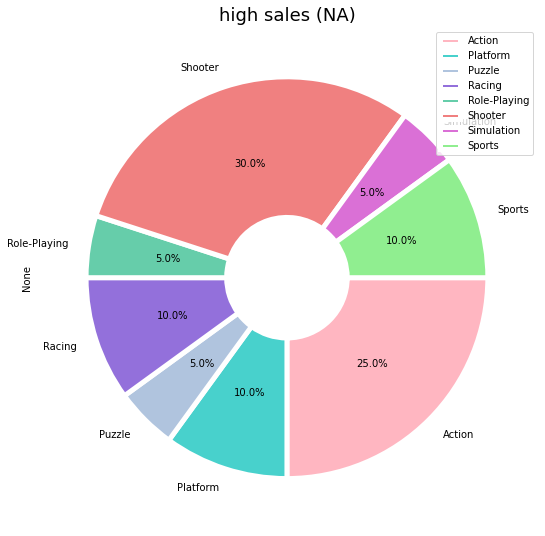

In [85]:
# NA 출고량 높은 게임



grouped = na_sort_year.groupby('Genre')
grouped.first()

grouped_size = grouped.size()
grouped_size

grouped_size.index = ['Action', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports']
grouped_size

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['lightpink', 'mediumturquoise', 'lightsteelblue', 'mediumpurple', 'mediumaquamarine','lightcoral', 'orchid', 'lightgreen']

grouped_size.plot.pie(figsize=(9,13), autopct='%1.1f%%', counterclock=False, colors=colors, wedgeprops=wedgeprops)

plt.title('high sales (NA)', size=18)

plt.legend(grouped_size.index, loc='best')
plt.show()

In [86]:
# EU Sales 출고량 높은 순으로 내림차순 15개 -> 년도 순으로 다시 내림차순

eu_sort = df.sort_values('EU_Sales', ascending = False)
eu_sort = eu_sort.head(20)
eu_sort_year = eu_sort.sort_values('Year', ascending = False)
eu_sort_year = eu_sort_year.head(20)

grouped2 = eu_sort_year.groupby('Genre')
grouped2.first()


grouped_size2 = grouped2.size()
grouped_size2

Genre
Action          4
Misc            2
Platform        2
Puzzle          1
Racing          1
Role-Playing    3
Shooter         3
Simulation      1
Sports          3
dtype: int64

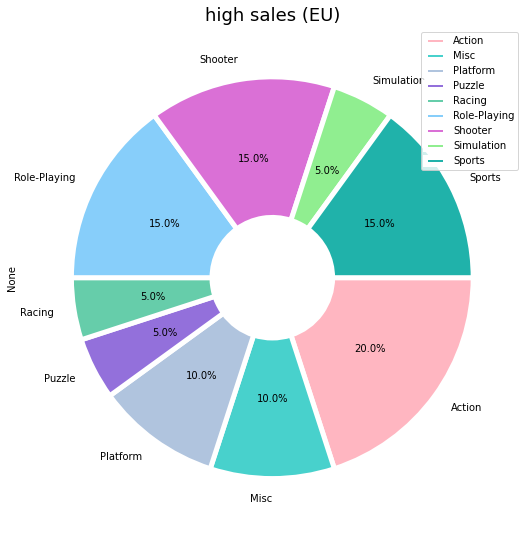

In [87]:
# EU 출고량 높은 게임


wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['lightpink', 'mediumturquoise', 'lightsteelblue', 'mediumpurple', 'mediumaquamarine','lightskyblue', 'orchid', 'lightgreen', 'lightseagreen']

grouped_size2.plot.pie(figsize=(9,13), autopct='%1.1f%%', counterclock=False, colors=colors, wedgeprops=wedgeprops)

plt.title('high sales (EU)', size=18)

plt.legend(grouped_size2.index, loc='best')
plt.show()

In [88]:
# JP Sales 출고량 높은 순으로 내림차순 15개 -> 년도 순으로 다시 내림차순

jp_sort = df.sort_values('JP_Sales', ascending = False)
jp_sort = jp_sort.head(20)
jp_sort_year = jp_sort.sort_values('Year', ascending = False)
jp_sort_year = jp_sort_year.head(20)

grouped3 = jp_sort_year.groupby('Genre')
grouped3.first()

grouped_size3 = grouped3.size()
grouped_size3

Genre
Action          1
Misc            1
Platform        4
Puzzle          2
Racing          1
Role-Playing    9
Simulation      2
dtype: int64

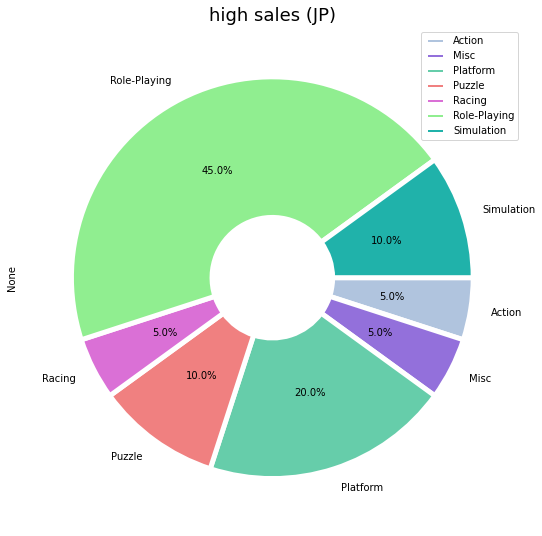

In [89]:
# JP 출고량 높은 게임



wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['lightsteelblue', 'mediumpurple', 'mediumaquamarine','lightcoral', 'orchid', 'lightgreen', 'lightseagreen']

grouped_size3.plot.pie(figsize=(9,13), autopct='%1.1f%%', counterclock=False, colors=colors, wedgeprops=wedgeprops)

plt.title('high sales (JP)', size=18)

plt.legend(grouped_size3.index, loc='best')
plt.show()

In [90]:
# Other Sales 출고량 높은 순으로 내림차순 15개 -> 년도 순으로 다시 내림차순

other_sort = df.sort_values('Other_Sales', ascending = False)
other_sort = other_sort.head(20)
other_sort_year = other_sort.sort_values('Year', ascending = False)
other_sort_year = other_sort_year.head(20)
other_sort_year

grouped4 = other_sort_year.groupby('Genre')
grouped4.first()

grouped_size4 = grouped4.size()
grouped_size4

Genre
Action        4
Misc          2
Platform      2
Racing        3
Shooter       2
Simulation    1
Sports        6
dtype: int64

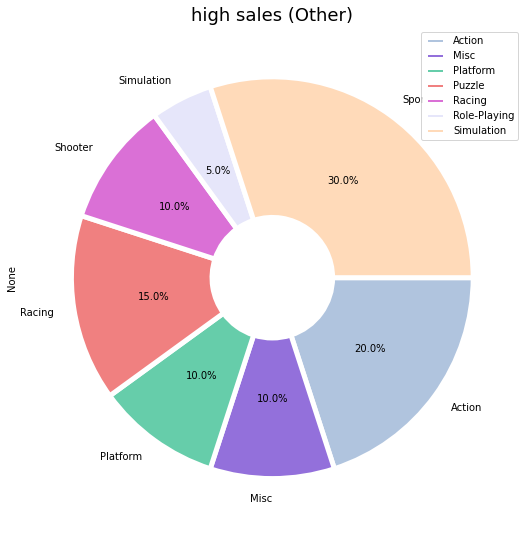

In [91]:
# Other 출고량 높은 게임



wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['lightsteelblue', 'mediumpurple', 'mediumaquamarine','lightcoral', 'orchid', 'lavender', 'peachpuff']

grouped_size4.plot.pie(figsize=(9,13), autopct='%1.1f%%', counterclock=False, colors=colors, wedgeprops=wedgeprops)

plt.title('high sales (Other)', size=18)

plt.legend(grouped_size3.index, loc='best')
plt.show()

In [92]:
# global 출고량 높은 순으로 내림차순 15개 -> 년도 순으로 다시 내림차순

global_sort = df.sort_values('Global', ascending = False)
global_sort = global_sort.head(20)
global_sort_year = global_sort.sort_values('Year', ascending = False)
global_sort_year = global_sort_year.head(20)
global_sort_year

grouped5 = global_sort_year.groupby('Genre')
grouped5.first()

grouped_size5 = grouped5.size()
grouped_size5

Genre
Action          3
Misc            2
Platform        2
Puzzle          1
Racing          2
Role-Playing    6
Shooter         2
Sports          2
dtype: int64

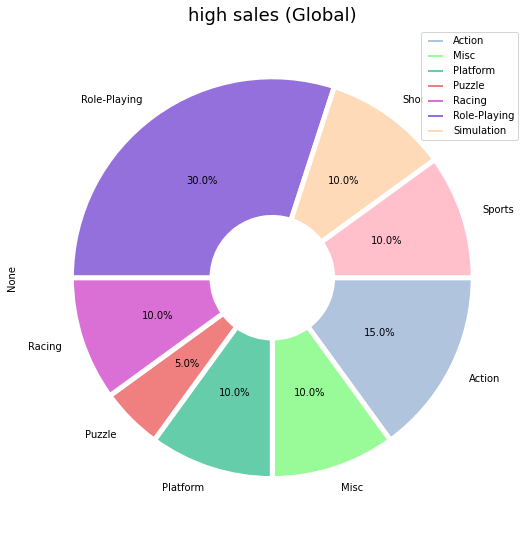

In [93]:
# global 출고량 높은 게임



wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['lightsteelblue', 'palegreen', 'mediumaquamarine','lightcoral', 'orchid', 'mediumpurple', 'peachpuff', 'pink']

grouped_size5.plot.pie(figsize=(9,13), autopct='%1.1f%%', counterclock=False, colors=colors, wedgeprops=wedgeprops)

plt.title('high sales (Global)', size=18)

plt.legend(grouped_size3.index, loc='best')
plt.show()

In [94]:
# Other Sales 출고량 높은 순으로 내림차순 15개 -> 년도 순으로 다시 내림차순

other_sort = df.sort_values('Other_Sales', ascending = False)
other_sort = other_sort.head(15)
other_sort_year = other_sort.sort_values('Year', ascending = False)
other_sort_year = other_sort_year.head(15)
other_sort_year

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global
8925,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.770000,5.810000,0.35,2.31,14.240000
3460,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.010000,9.270000,0.97,4.14,21.390000
4196,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.990000,5.880000,0.65,2.52,14.040000
6126,Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2.960000,4.880000,0.81,2.12,10.770000
3334,Wii Sports Resort,Wii,2009,Sports,Nintendo,0.000016,0.000011,3.28,2.96,6.240027
16192,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,0.000015,7.060000,4.70,2.26,14.020015
12343,Mario Kart Wii,Wii,2008,Racing,Nintendo,0.000016,0.000013,3.79,3.31,7.100029
8086,Pro Evolution Soccer 2008,PS2,2007,Sports,Konami Digital Entertainment,0.050000,0.000000,0.64,2.93,3.620000
846,FIFA Soccer 08,PS2,2007,Sports,Electronic Arts,0.680000,0.000000,0.00,2.46,3.140000
3413,Wii Fit,Wii,2007,Sports,Nintendo,8.940000,8.030000,3.60,2.15,22.720000


In [95]:
# df 나라 합 다 더한 값을 global에 넣음

df['Global'] = 0

df['Global'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16252,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16253,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16254,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16255,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [96]:
# Global Sales 출고량 높은 순으로 내림차순 15개 -> 년도 순으로 다시 내림차순

global_sort = df.sort_values('Global', ascending = False)
global_sort = global_sort.head(15)
global_sort_year = global_sort.sort_values('Year', ascending = False)
global_sort_year = round(global_sort_year.head(15), 2)

In [97]:
# EU 기준 내림차순

df_sort2 = df.sort_values('EU_Sales', ascending = False)
df_sort2 = df_sort2.head(10)

In [98]:
# JP 기준 내림차순

df_sort3 = df.sort_values('JP_Sales', ascending = False)
df_sort3 = df_sort3.head(10)

In [99]:
# Other 기준 내림차순

df_sort4 = df.sort_values('Other_Sales', ascending = False)
df_sort4 = df_sort4.head(10)
df_sort4

other_g = df.sort_values('Genre', ascending = False)
other_g = df.head(10)

In [100]:
other_s = df_sort4[['Other_Sales']]

In [101]:
# 인덱스 빼고 Other_Sales만 추출

df_reset = other_s.set_index('Other_Sales')

In [102]:
# Genre 장르만 추출

other_g = df_sort4[['Genre']]

In [103]:
# 인덱스 빼고 Genre만 추출

other_g_r = other_g.set_index('Genre')